In [1]:
import py4DSTEM
import numpy as np
import matplotlib.pyplot as plt
import itertools as it
from copy import deepcopy
import pickle
from pathlib import Path
from matplotlib.colors import hsv_to_rgb
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import joblib
import sys
from sklearn.metrics import log_loss
from matplotlib.ticker import PercentFormatter
import warnings
from matplotlib.cm import ScalarMappable
import matplotlib
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from sklearn.metrics import r2_score
from final_RF_Functions import *
import math
%load_ext autoreload
%autoreload 2
from final_RF_Diffraction_OOP import *
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
plt.rcdefaults()
mpl.style.use('default')
plt.rcParams['pdf.fonttype'] = 'truetype'
from scipy.ndimage import gaussian_filter
from sklearn.decomposition import PCA

In [1]:
# radial_inputs_0 = joblib.load('Model_data/Crystal_sys_inputs/radial_inputs_0.joblib')
# radial_inputs_1 = joblib.load('Model_data/Crystal_sys_inputs/radial_inputs_1.joblib')

# with open('Model_data/Crystal_sys_inputs/radial_inputs_2.pkl', 'rb') as f:
#     radial_inputs_2 = pickle.load(f)
# with open('Model_data/Crystal_sys_inputs/radial_inputs_3.pkl', 'rb') as f:
#     radial_inputs_3 = pickle.load(f)

# radial_train_ids = joblib.load('Model_data/Crystal_sys_inputs/radial_inputs_0_5.joblib')
# radial_test_ids = joblib.load('Model_data/Crystal_sys_inputs/radial_inputs_1_5.joblib')

Load Dataset

In [2]:
rf_diff_obj = RF_Diffraction_model('no_input_vector_Final_0_05_spacing_radial_dataframe_100423.pkl', 
                                   ['Model_data/Lattice_inputs_and_outputs/radial_cubic_df_w_lattice.joblib', 
                                    'Model_data/Lattice_inputs_and_outputs/radial_monoclinic_df_w_lattice.joblib',
                                    'Model_data/Lattice_inputs_and_outputs/radial_hexagonal_df_w_lattice.joblib', 
                                    'Model_data/Lattice_inputs_and_outputs/SCALED_radial_orthorhombic_df_w_lattice.joblib',
                                    'Model_data/Lattice_inputs_and_outputs/radial_tetragonal_df_w_lattice.joblib', 
                                    'Model_data/Lattice_inputs_and_outputs/radial_trigonal_df_w_lattice.joblib',
                                    'Model_data/Lattice_inputs_and_outputs/radial_triclinic_df_w_lattice.joblib'],
                                  'output_df.joblib')

In [3]:
rf_diff_obj2 = RF_Diffraction_model('Full_radial_200_ang_0.pkl', 
                                   ['radial_cubic_df_w_lattice.joblib', 'radial_monoclinic_df_w_lattice.joblib',
                                                                        'radial_hexagonal_df_w_lattice.joblib', 'SCALED_radial_orthorhombic_df_w_lattice.joblib',
                                                                        'radial_tetragonal_df_w_lattice.joblib', 'radial_trigonal_df_w_lattice.joblib',
                                                                        'radial_triclinic_df_w_lattice.joblib'])

In [4]:
rf_diff_obj.load_full_df() # load data from path provided 

In [5]:
rf_diff_obj2.load_full_df()

<font size="6"> Figure 2 and S2

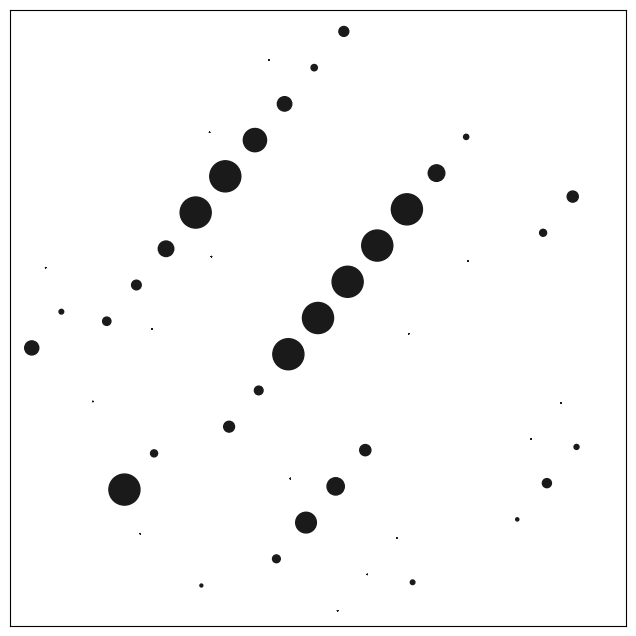

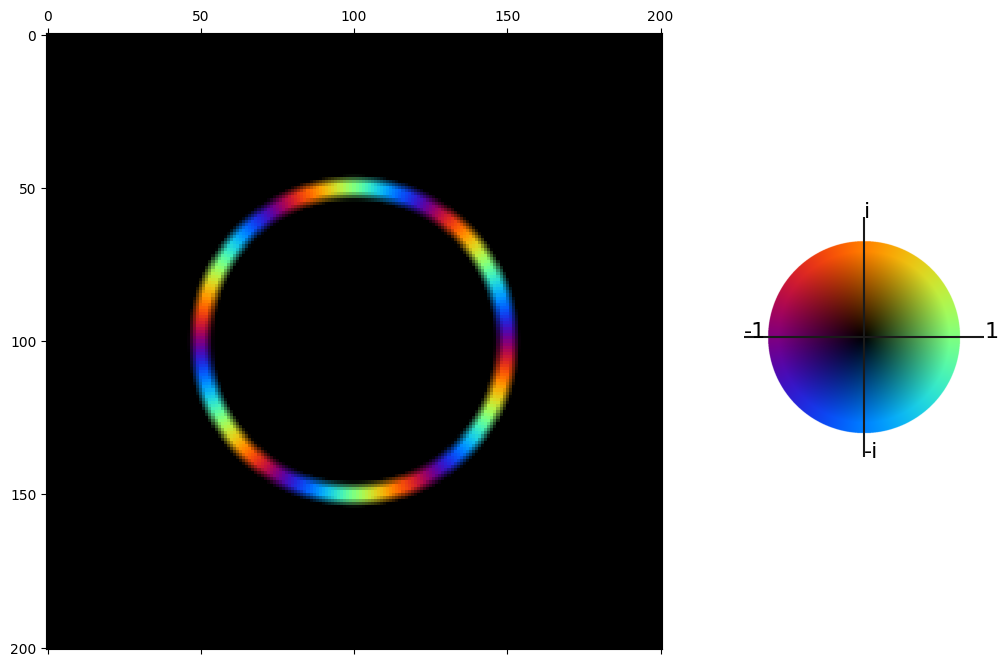

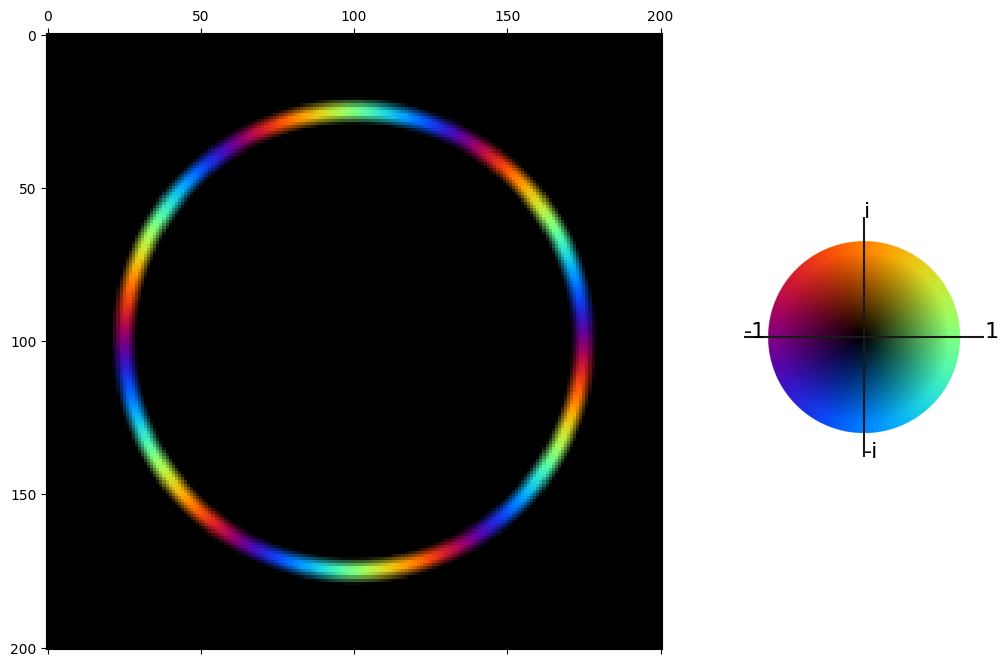

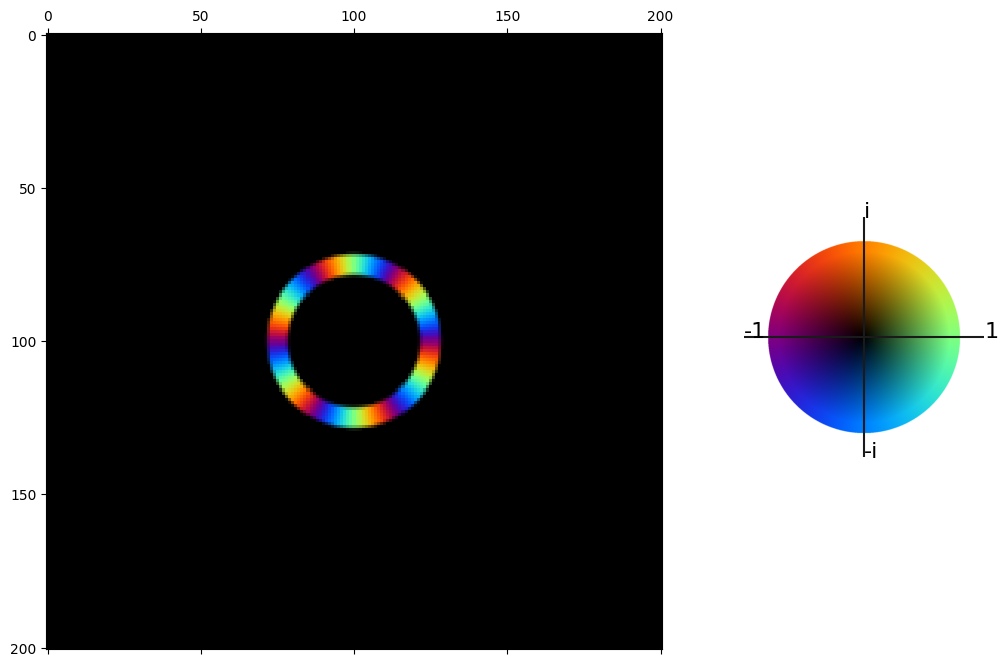

In [7]:
fig, scale = visualize_radial_components(rf_diff_obj2, (0.7519243758020778, 0.13895000845294775, 0.6444397785872482), include_x_label = False, include_y_label = False, radial_params = [[12, 6], [18, 6], [6, 6]])


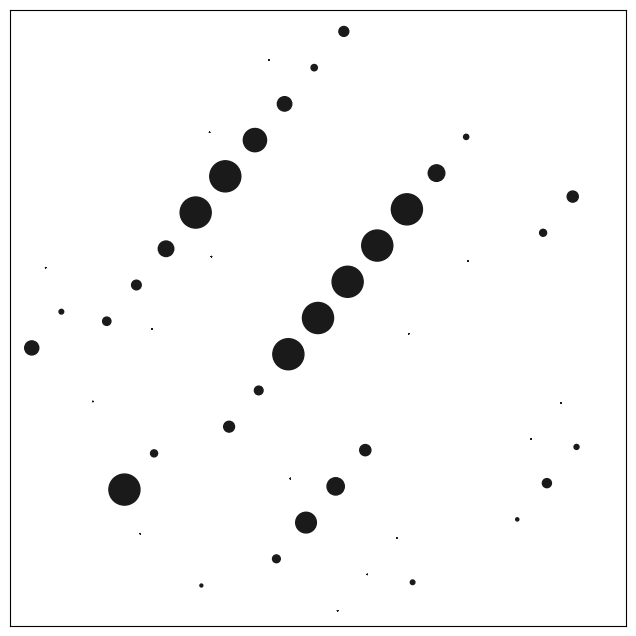

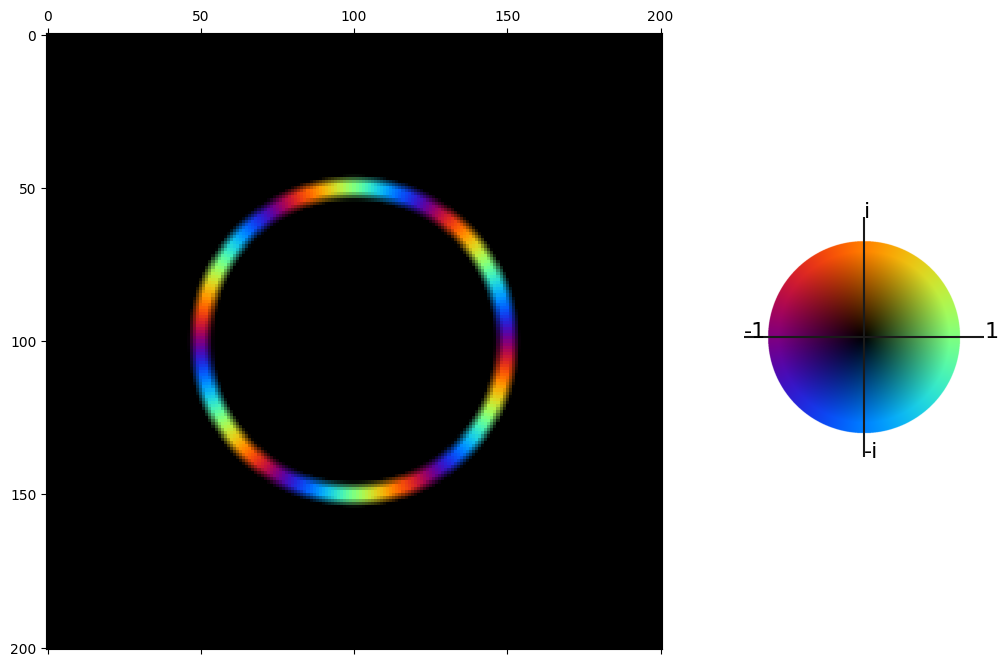

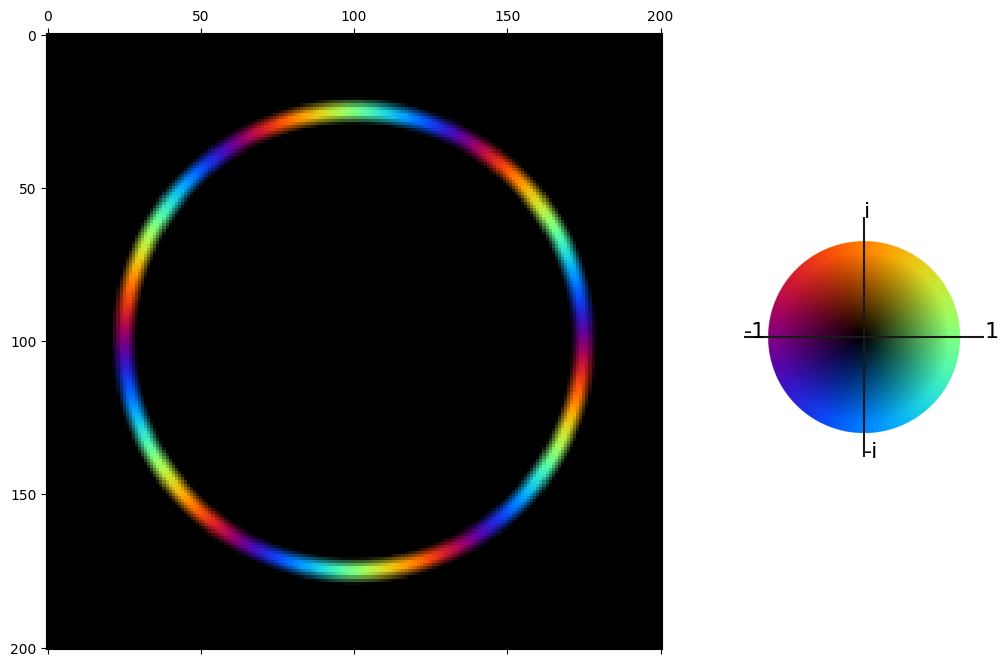

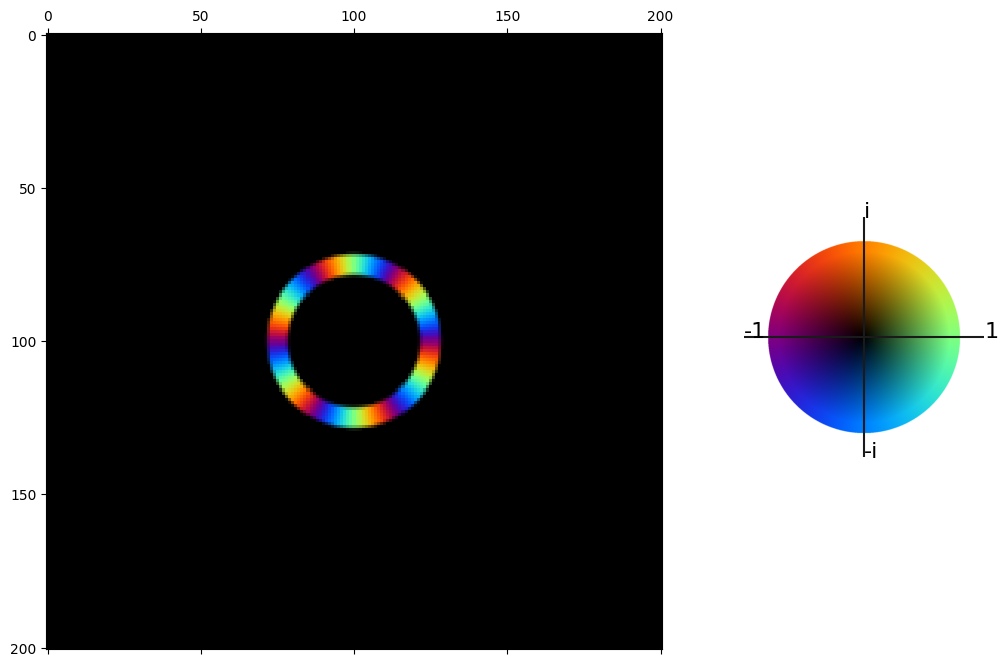

In [8]:
fig, scale = visualize_radial_components(rf_diff_obj2, (0.7519243758020778, 0.13895000845294775, 0.6444397785872482), include_x_label = False, include_y_label = False, radial_params = [[12, 6], [18, 6], [6, 6]])

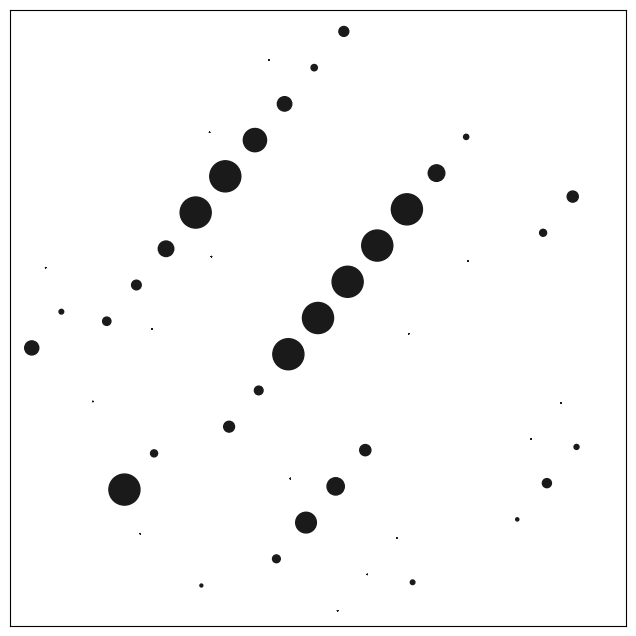

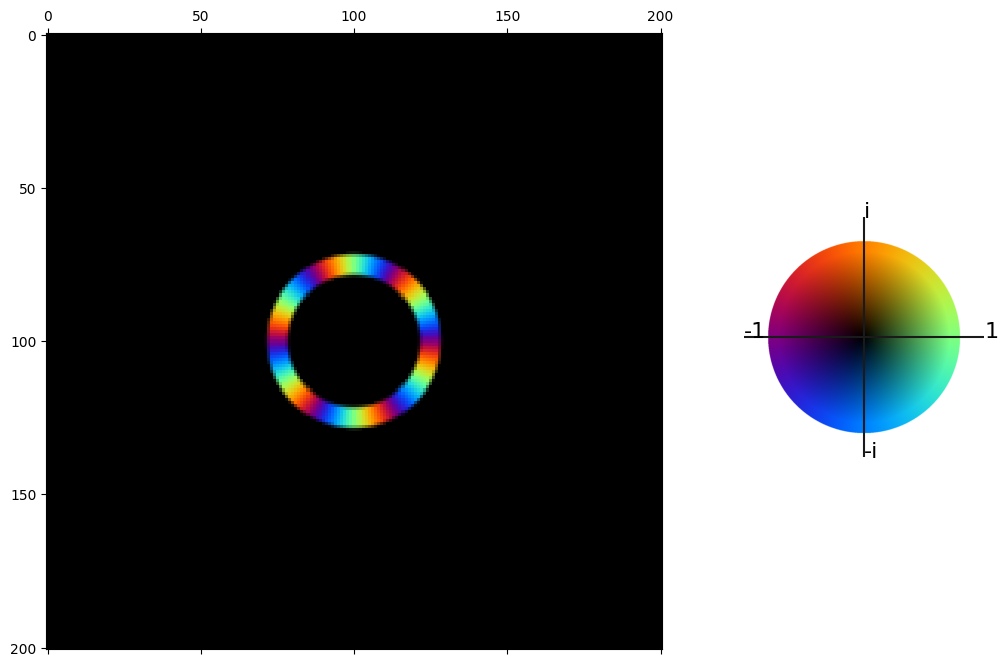

In [9]:
fig1_5, scale = visualize_radial_components(rf_diff_obj2, (0.7519243758020778, 0.13895000845294775, 0.6444397785872482), include_x_label = False, include_y_label = False, radial_params = [[6, 6]])

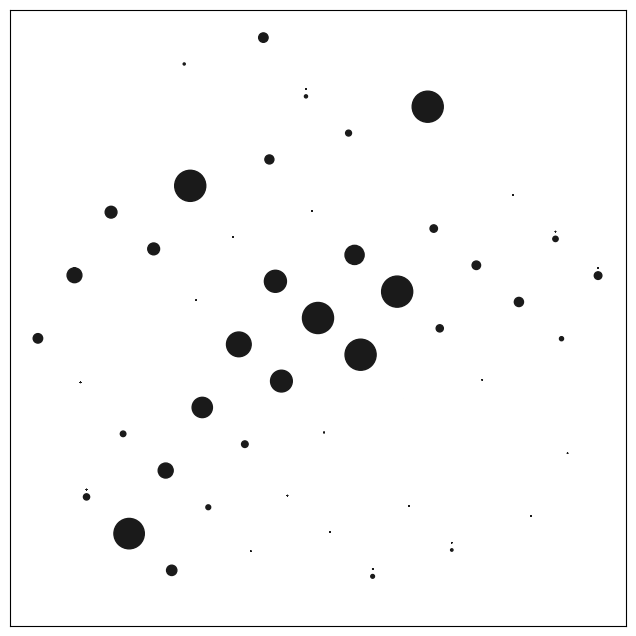

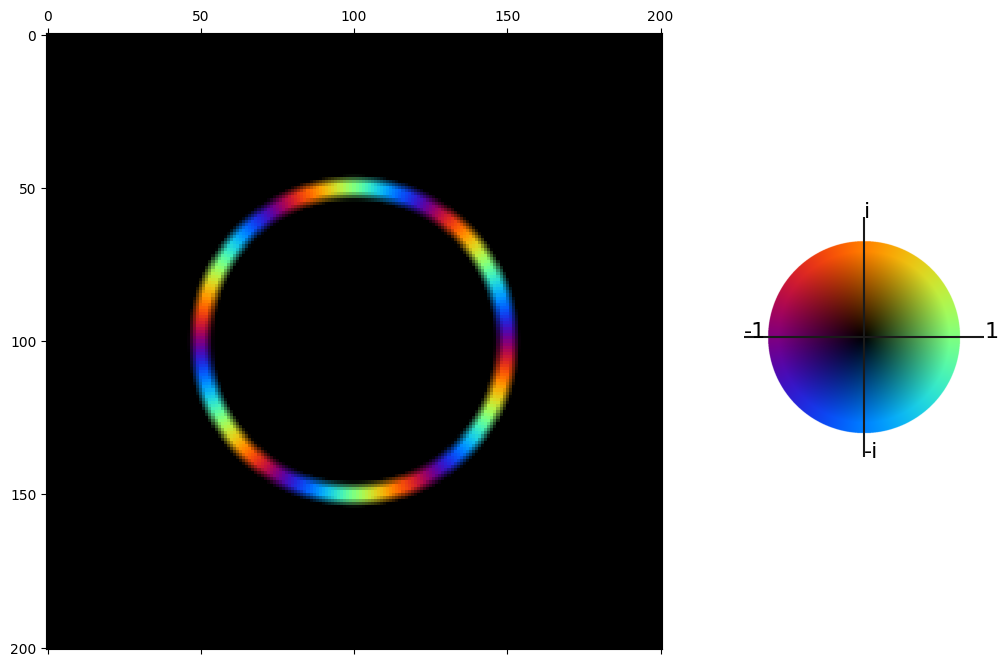

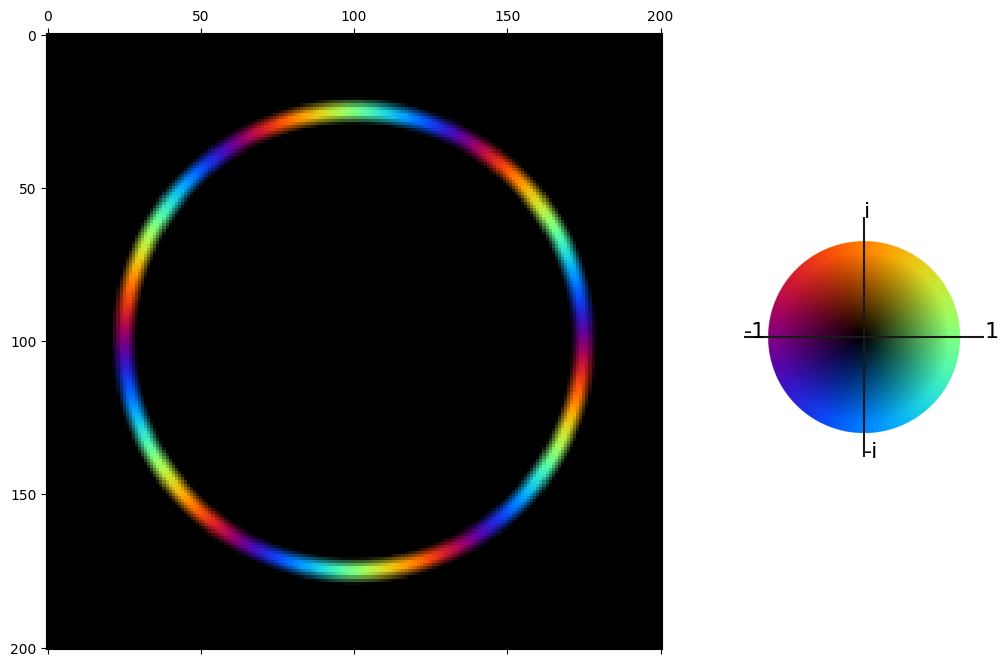

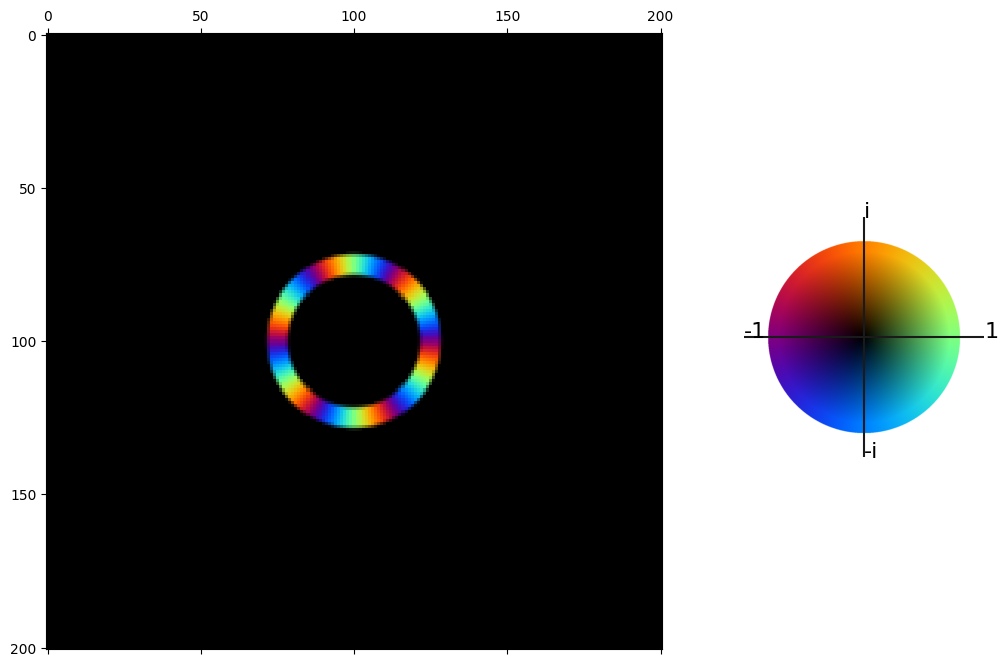

In [10]:
fig2, scale = visualize_radial_components(rf_diff_obj2, (0.9302839215348991, 0.35907619075631536, 0.075074060537472), include_x_label = False, include_y_label = False, radial_params = [[12, 6], [18, 6], [6, 6]])

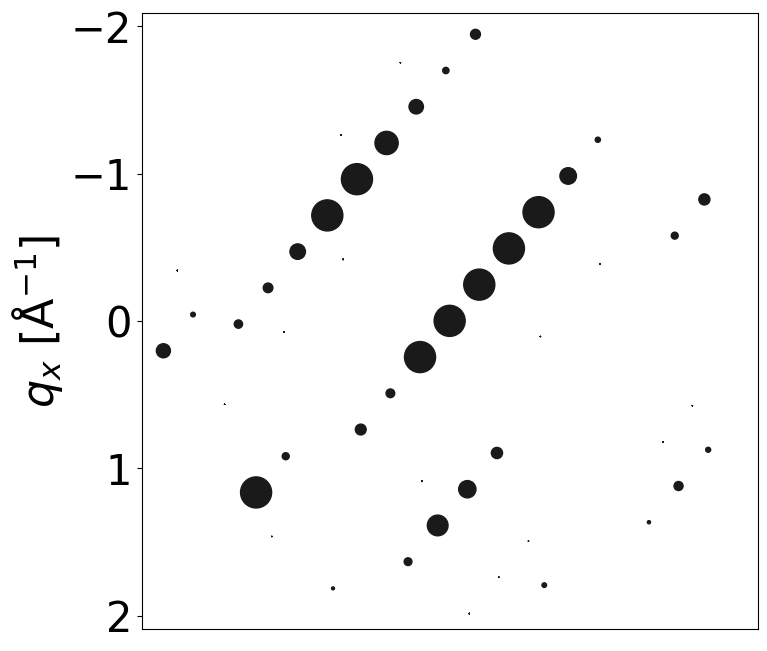

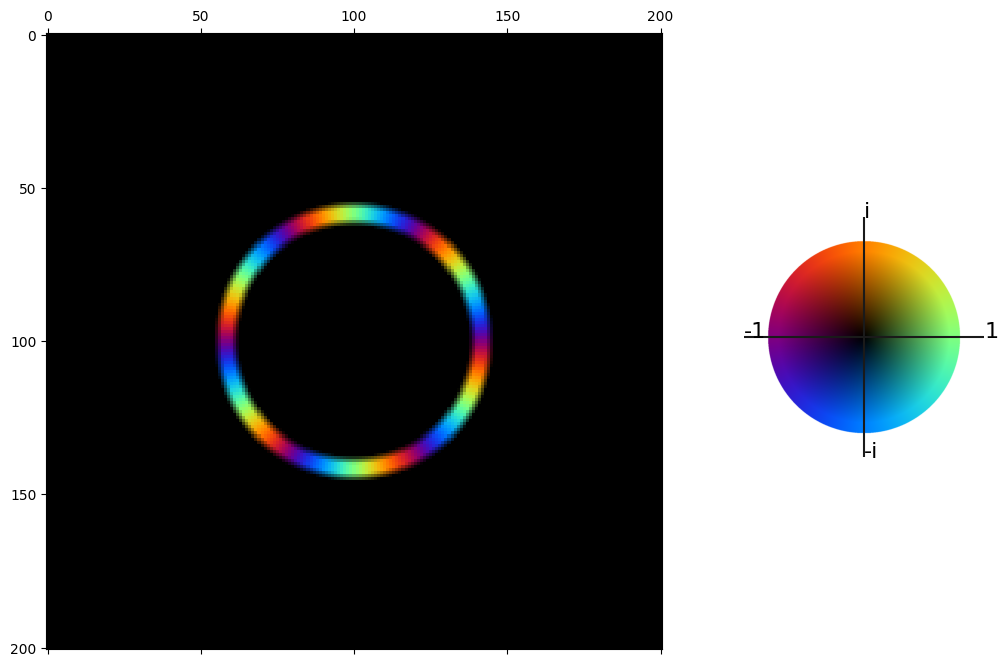

In [11]:
fig2_5, scale = visualize_radial_components(rf_diff_obj2, (0.7519243758020778, 0.13895000845294775, 0.6444397785872482), include_x_label = False, include_y_label = True, radial_params = [[10, 6]])

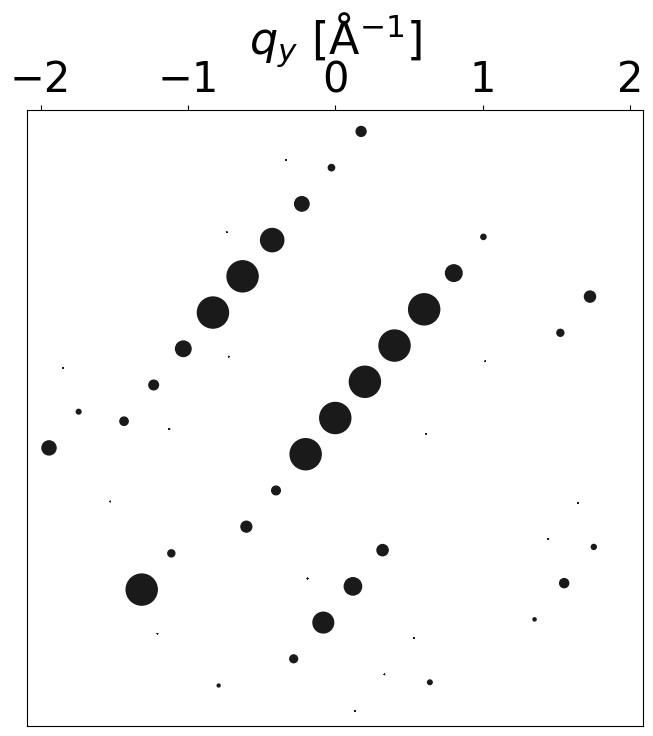

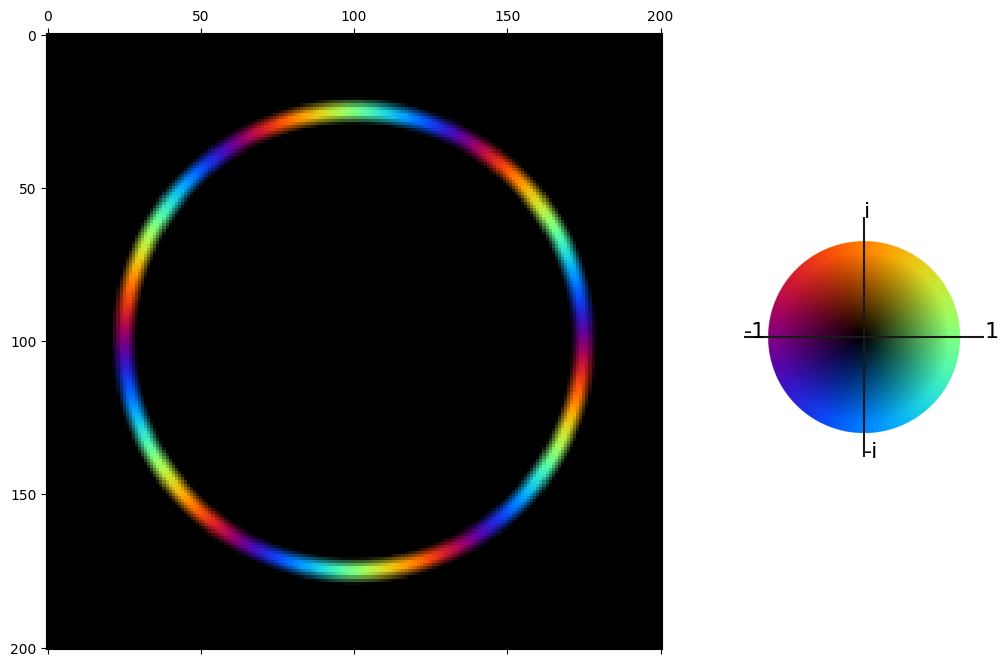

In [12]:
fig3, scale = visualize_radial_components(rf_diff_obj2, (0.7519243758020778, 0.13895000845294775, 0.6444397785872482), [[18,6]], include_x_label = True, include_y_label = False)

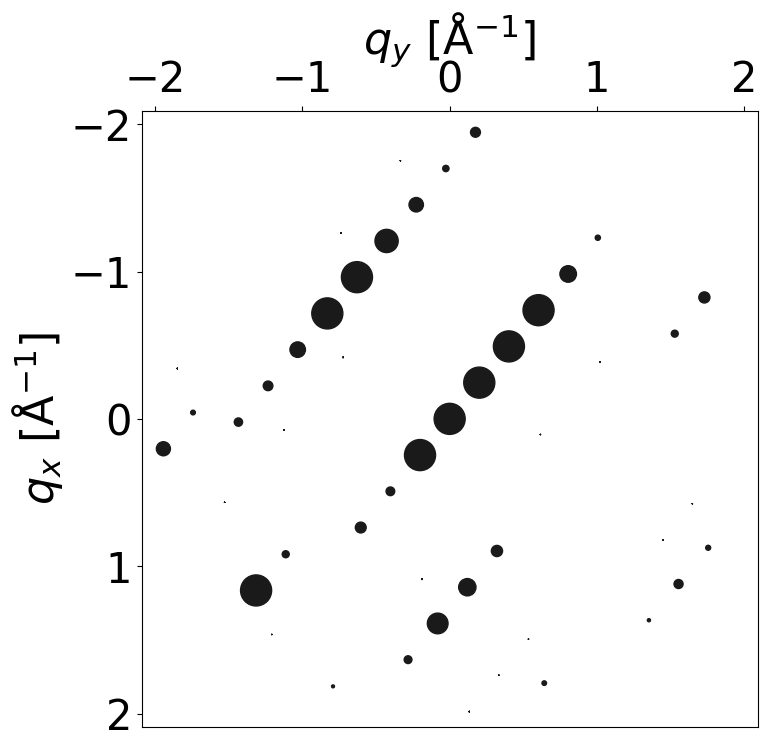

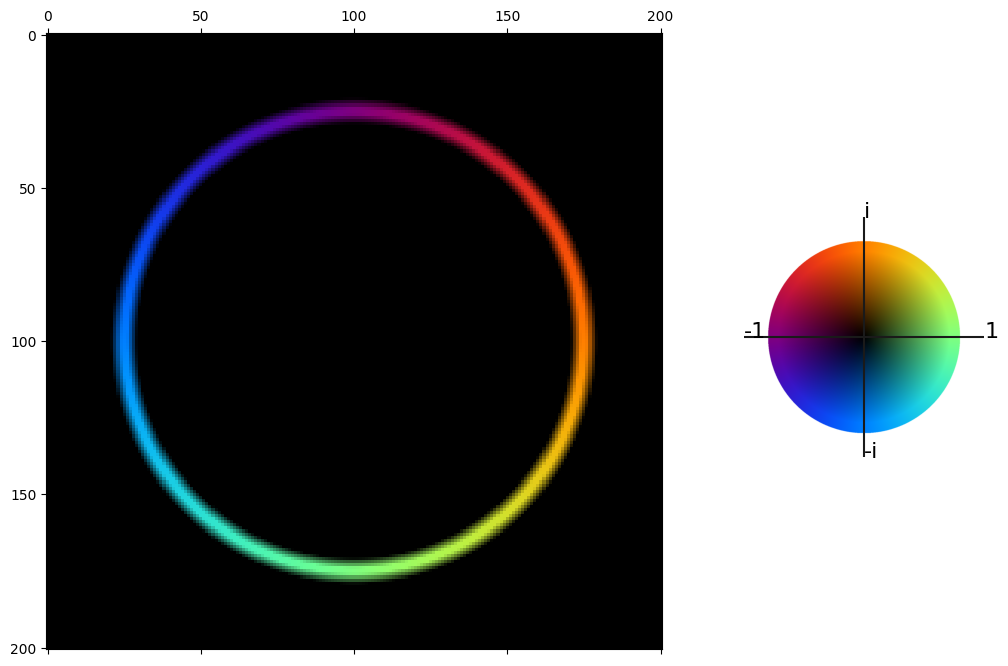

In [13]:
fig4, scale = visualize_radial_components(rf_diff_obj2, (0.7519243758020778, 0.13895000845294775, 0.6444397785872482), [[18,1]], include_x_label = True, include_y_label = True)

<font size="6"> Save Figures

In [14]:
# plt.rcParams['pdf.fonttype'] = 'truetype'
# scale[0].savefig('radial_basis_colorbar.pdf', bbox_inches="tight")

# fig.savefig('radial_basis_example_1.pdf', bbox_inches="tight")

# fig1_5.savefig('radial_basis_example_1_5.pdf', bbox_inches="tight")

# fig2.savefig('pattern_example_2.pdf', bbox_inches="tight")

# fig2_5.savefig('radial_basis_example_2_5.pdf', bbox_inches="tight")

# fig3.savefig('radial_basis_example_3.pdf', bbox_inches="tight")

# fig4.savefig('radial_basis_example_4.pdf', bbox_inches="tight")

<font size="6"> Figure 2

In [14]:
rf_diff_obj.condense_crystal_system_output(method='Difference Aggregation', load_from_path = True, num=10,
            path = '10_pattern_lattice_added_difference_aggregation_condensed_df.joblib')

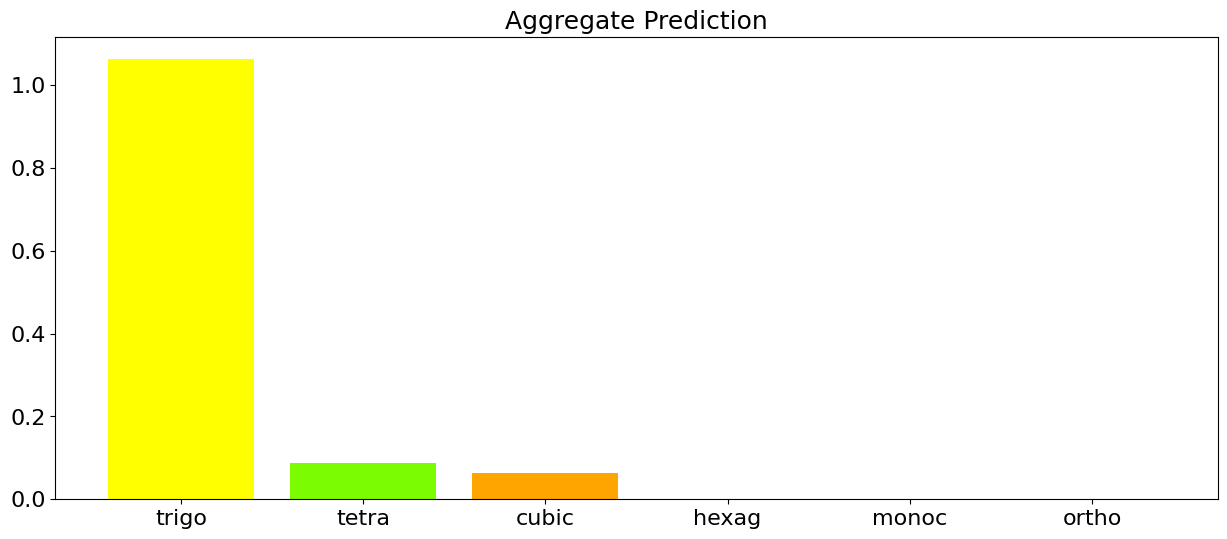

In [15]:
sorted_df = sorted(rf_diff_obj.condensed_output_df.iloc[2]['Full Weights Crystal System'].items(), key=lambda x: x[1], reverse=True)

labels = []
for i in sorted_df:
    labels.append(i[0][0:5])
plt.figure(figsize = (15,6))
# plt.title(rf_diff_obj.condensed_output_df.iloc[0]['mat_id'] + ' Difference Aggregate', fontsize = 18)
plt.title('Aggregate Prediction', fontsize = 18)
colors = ['yellow', 'lawngreen', 'orange', 'purple', 'orange', 'deepskyblue']
for i in range(0, 6): 
    plt.bar(labels[i], sorted_df[i][1], color = colors[i])
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.rcParams['pdf.fonttype'] = 'truetype'
# plt.savefig('agg_pred_example'+'.pdf', bbox_inches="tight")
plt.show()

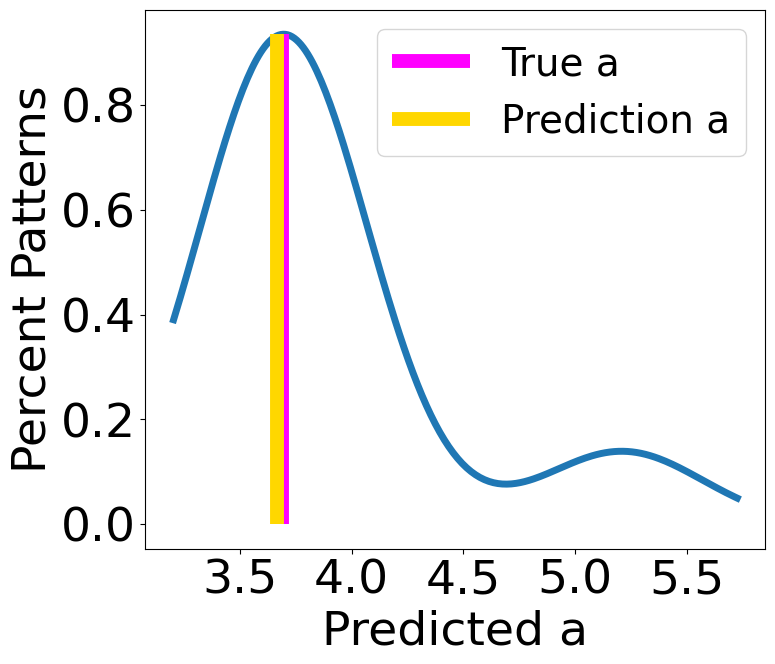

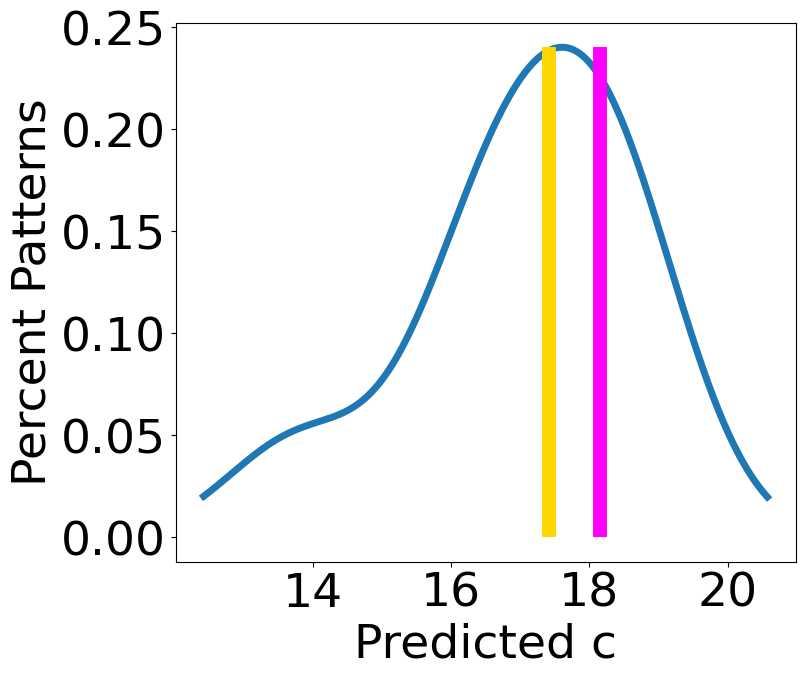

In [16]:
mpl.style.use('default')
plt.rcParams['pdf.fonttype'] = 'truetype'
t = rf_diff_obj.lattice_visualize_predictions_by_material(material_id = 'mp-1001786', show_plots = False,param_list = ['a','c'], index_list = [0,2],
                                            savefigure=False, include_legend = [True,False], filename='Figures/Figure 1/figure1_lattice_example_',
                                            xticks = [[3.5,4,4.5,5,5.5], [10,12,14,16,18,20]])

starting
loaded dfs
2046
682
326
starting input processing


[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=128)]: Done   3 out of 128 | elapsed:    0.2s remaining:    6.4s
[Parallel(n_jobs=128)]: Done  68 out of 128 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=128)]: Done 128 out of 128 | elapsed:    0.3s finished


starting aggregation
Accurate Accuracy
0.8834355828220859
Inaccurate Accuracy
0.0
All Accuracy
0.8520710059171598


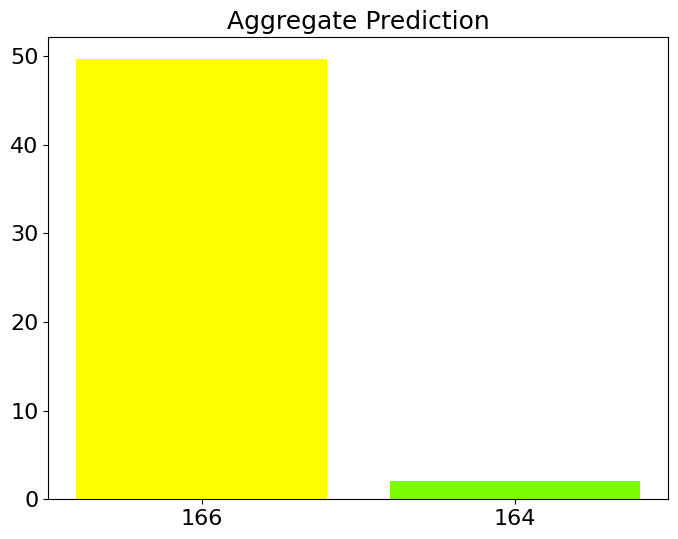

In [17]:
rf_diff_obj.loaded_submodels_space_group = [False, '']
out_df = rf_diff_obj.visualize_space_group_results_aggregate('trigonal')
    
sorted_df = sorted(out_df.loc[out_df['material_id'] == 'mp-1001786']['averaged_weights_space_group'].items(), key=lambda x: x[1], reverse=True)[0][1]

labels = []
for i in sorted_df.keys():
    labels.append(i[0:5])
plt.figure(figsize = (8,6))
# plt.title(rf_diff_obj.condensed_output_df.iloc[0]['mat_id'] + ' Difference Aggregate', fontsize = 18)
plt.title('Aggregate Prediction', fontsize = 18)
colors = ['yellow', 'lawngreen', 'orange', 'purple', 'orange', 'deepskyblue']
for i in range(0, 2): 
    plt.bar(labels[i], sorted_df[labels[i]], color = colors[i])
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.rcParams['pdf.fonttype'] = 'truetype'
# plt.savefig('SG_agg_pred_example'+'.pdf', bbox_inches="tight")
plt.show()

<font size="6"> Figure 3

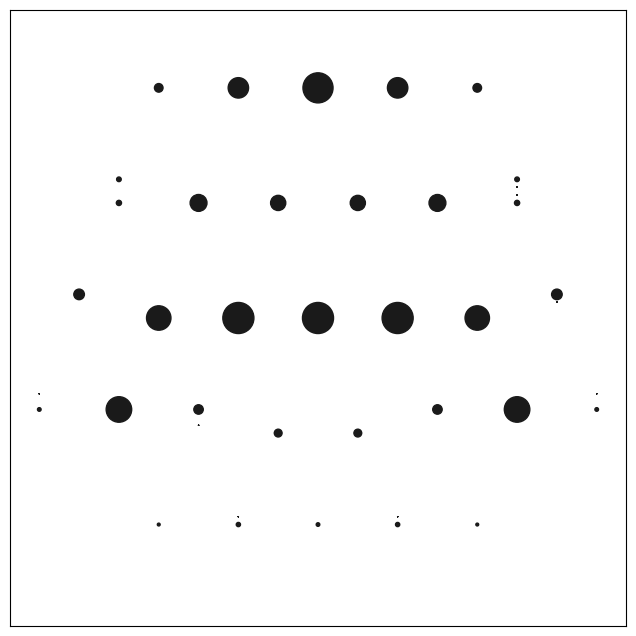

In [18]:
fig_3_example_1 = visualize_radial_components(rf_diff_obj2, (0.7060819365278469, -0.706081936527847, 0.05382005033601193), 
                                          include_x_label = False, include_y_label = False, radial_params = [])

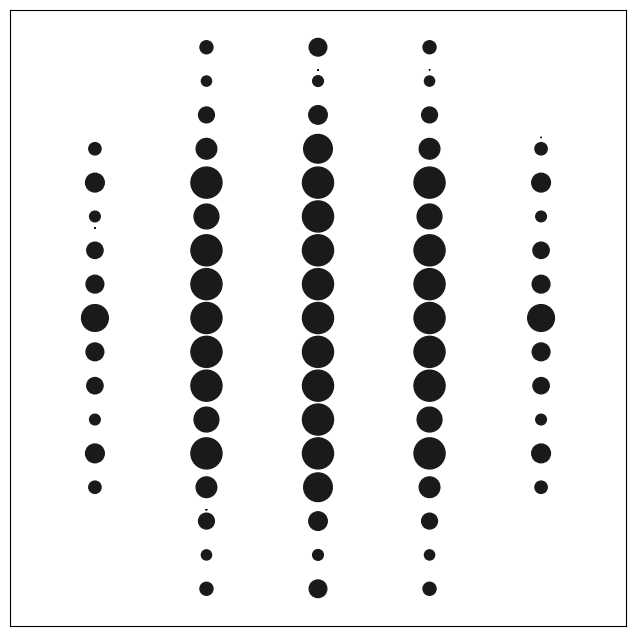

In [19]:
fig_3_example_2 = visualize_radial_components(rf_diff_obj2, (0.7071067811865476, -0.7071067811865475, 1.5171284458970975e-17), 
                                          include_x_label = False, include_y_label = False, radial_params = [])

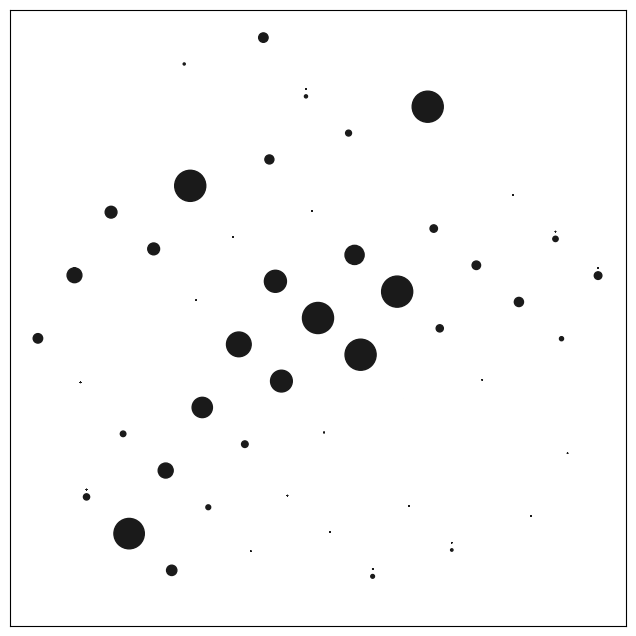

In [20]:
fig_3_example_3 = visualize_radial_components(rf_diff_obj2, (0.9302839215348991, 0.35907619075631536, 0.075074060537472), 
                                          include_x_label = False, include_y_label = False, radial_params = [])

In [35]:
# plt.rcParams['pdf.fonttype'] = 'truetype'
# fig_3_example_1.savefig('fig_3_example_1.pdf', bbox_inches="tight")

# fig_3_example_2.savefig('fig_3_example_2.pdf', bbox_inches="tight")

# fig_3_example_3.savefig('fig_3_example_3.pdf', bbox_inches="tight")

2603
['trigonal', 'hexagonal', 'monoclinic', 'tetragonal', 'orthorhombic', 'cubic']
trigonal        52
hexagonal        8
monoclinic       8
tetragonal       7
orthorhombic     4
cubic            1
dtype: int64


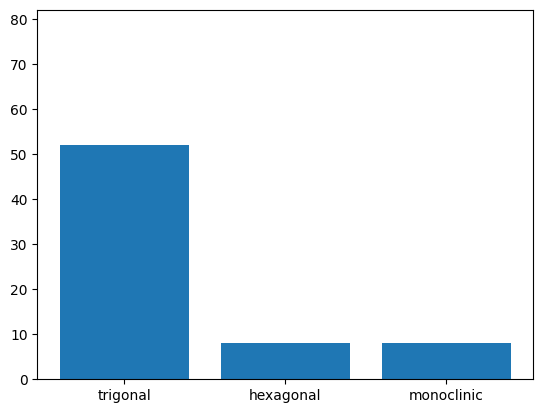

2621
['trigonal', 'monoclinic', 'tetragonal', 'orthorhombic', 'hexagonal']
trigonal        25
monoclinic      20
tetragonal      17
orthorhombic    11
hexagonal        7
dtype: int64


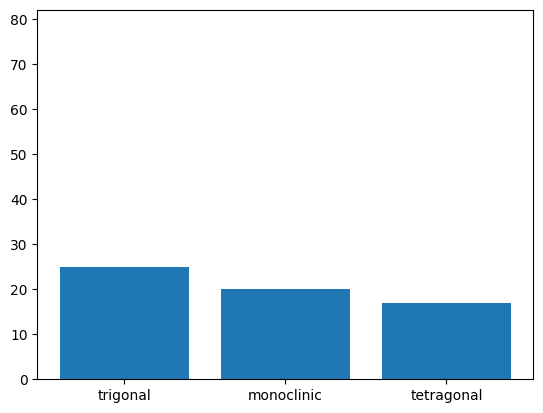

2619
['tetragonal', 'hexagonal', 'trigonal', 'orthorhombic', 'cubic', 'monoclinic']
tetragonal      19
hexagonal       18
trigonal        18
orthorhombic    13
cubic            6
monoclinic       6
dtype: int64


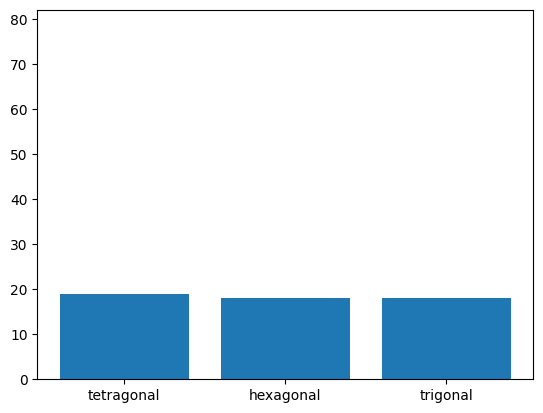

In [21]:
print(rf_diff_obj.output_df.loc[rf_diff_obj.output_df['mat_id'] == 'mp-1001786'].iloc[83]['Full DF Indicies'])
vals = pd.DataFrame(rf_diff_obj.output_df.loc[rf_diff_obj.output_df['mat_id'] == 'mp-1001786'].iloc[83]['Full Predictions Crystal System']).value_counts()
vals_use = []
for i in vals.index:
    vals_use.append(i[0])
print(vals_use)
mpl.style.use('default')
plt.rcParams['pdf.fonttype'] = 'truetype'
plt.bar(vals_use[0:3], np.asarray(vals)[0:3])
print(vals)
plt.ylim([0,82])
# plt.savefig('Accurate Example.pdf', bbox_inches="tight", transparent=True)
plt.show()

print(rf_diff_obj.output_df.loc[rf_diff_obj.output_df['mat_id'] == 'mp-1001786'].iloc[101]['Full DF Indicies'])
vals = pd.DataFrame(rf_diff_obj.output_df.loc[rf_diff_obj.output_df['mat_id'] == 'mp-1001786'].iloc[101]['Full Predictions Crystal System']).value_counts()
vals_use = []
for i in vals.index:
    vals_use.append(i[0])
print(vals_use)
mpl.style.use('default')
plt.rcParams['pdf.fonttype'] = 'truetype'
plt.bar(vals_use[0:3], np.asarray(vals)[0:3])
print(vals)
plt.ylim([0,82])
# plt.savefig('Accurate Low Con Example.pdf', bbox_inches="tight", transparent=True)
plt.show()

print(rf_diff_obj.output_df.loc[rf_diff_obj.output_df['mat_id'] == 'mp-1001786'].iloc[99]['Full DF Indicies'])
vals = pd.DataFrame(rf_diff_obj.output_df.loc[rf_diff_obj.output_df['mat_id'] == 'mp-1001786'].iloc[99]['Full Predictions Crystal System']).value_counts()
vals_use = []
for i in vals.index:
    vals_use.append(i[0])
print(vals_use)
mpl.style.use('default')
plt.rcParams['pdf.fonttype'] = 'truetype'
plt.bar(vals_use[0:3], np.asarray(vals)[0:3])
print(vals)
plt.ylim([0,82])
plt.show()

# plt.savefig('Innacurate Example.pdf', bbox_inches="tight", transparent=True)

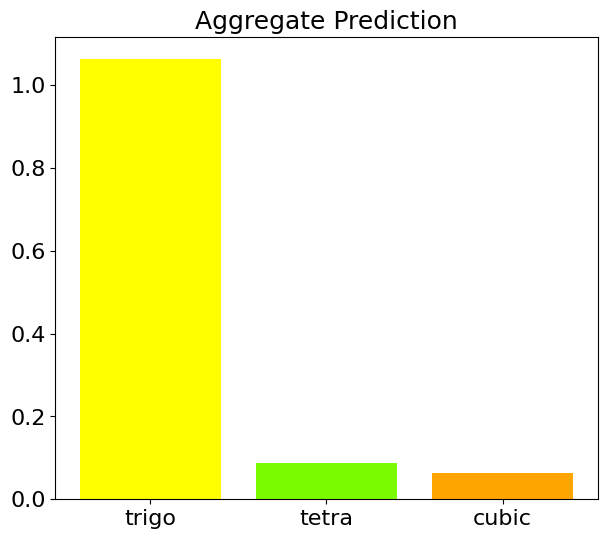

In [22]:
sorted_df = sorted(rf_diff_obj.condensed_output_df.iloc[2]['Full Weights Crystal System'].items(), key=lambda x: x[1], reverse=True)

labels = []
for i in sorted_df[0:3]:
    labels.append(i[0][0:5])
plt.figure(figsize = (7,6))
# plt.title(rf_diff_obj.condensed_output_df.iloc[0]['mat_id'] + ' Difference Aggregate', fontsize = 18)
plt.title('Aggregate Prediction', fontsize = 18)
colors = ['yellow', 'lawngreen', 'orange', 'purple', 'orange', 'deepskyblue']
for i in range(0, 3): 
    plt.bar(labels[i], sorted_df[i][1], color = colors[i])
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.rcParams['pdf.fonttype'] = 'truetype'
# plt.savefig('agg_pred_example'+'.pdf', bbox_inches="tight")
plt.show()

<font size="6"> Figure 4 

loading crystal system output
crystal system output loaded
crystal system 0.6716139944349833
point group 0.6716139944349833


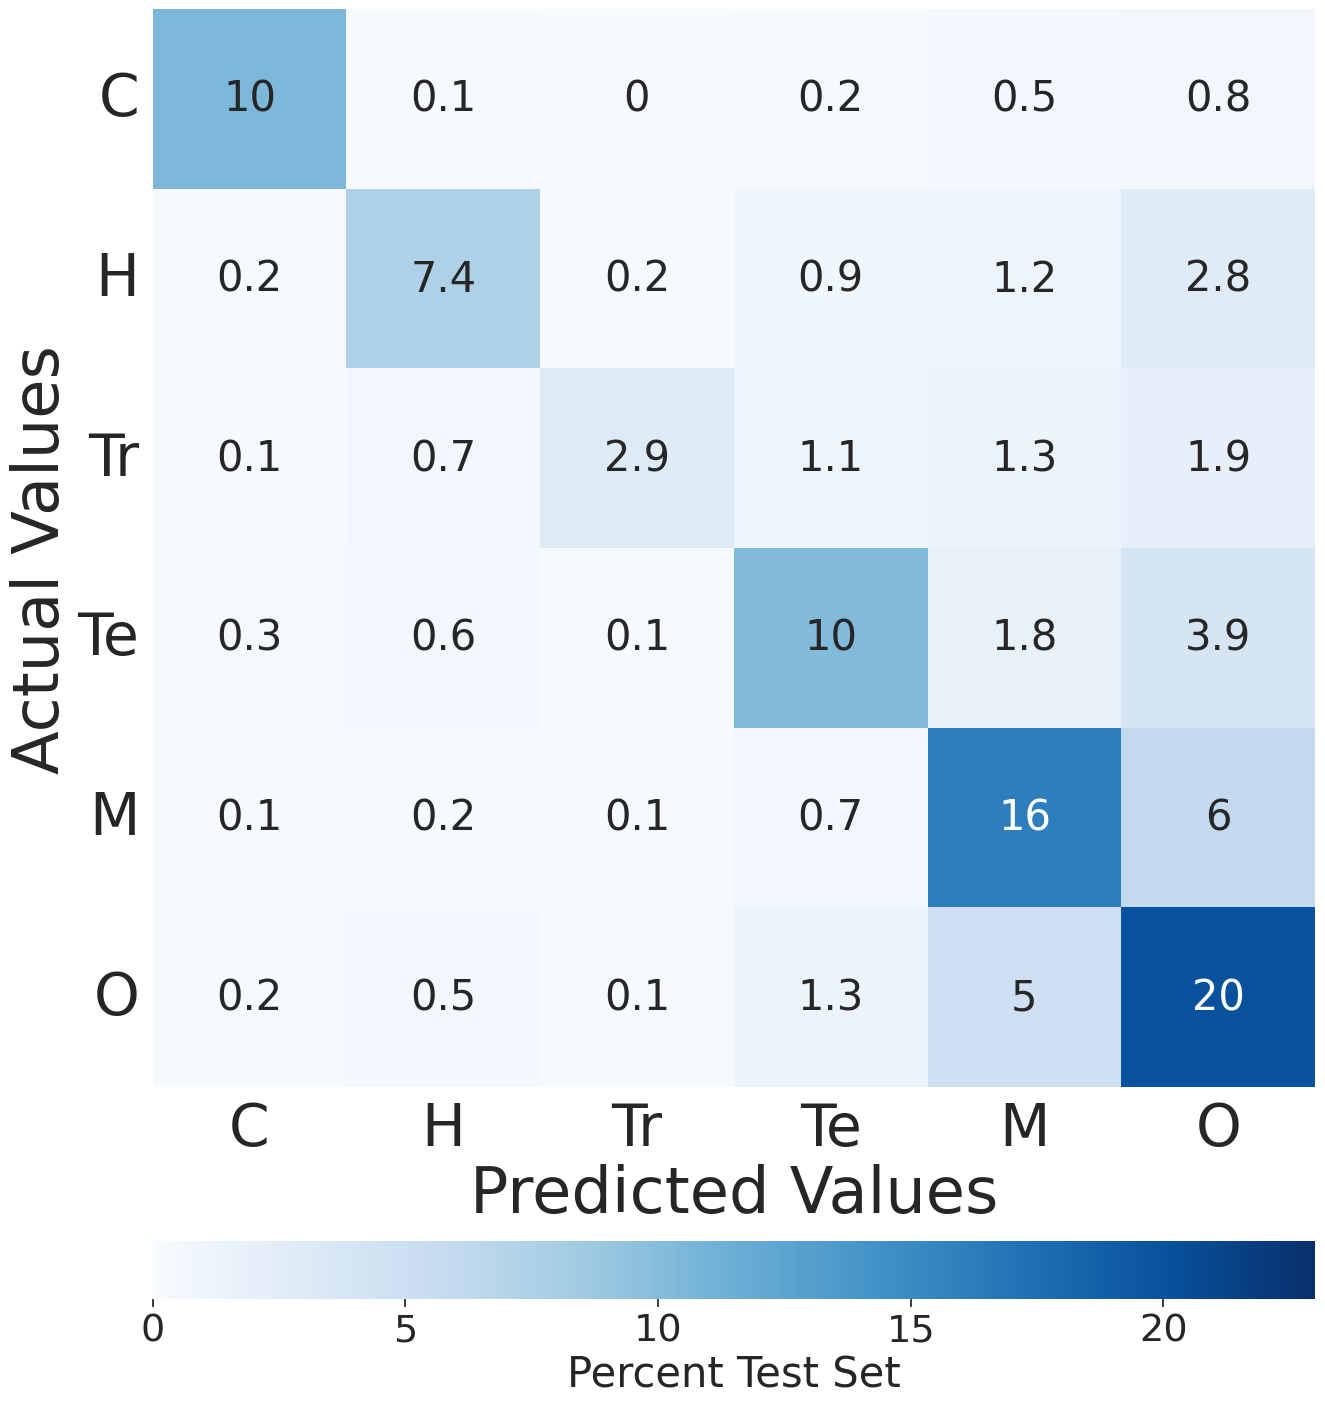

       C     H    Tr    Te     M     O
C   77.0  33.0  38.0  34.0  32.0  31.0
H   40.0  48.0  40.0  37.0  33.0  34.0
Tr  33.0  32.0  55.0  39.0  32.0  32.0
Te  35.0  33.0  46.0  48.0  33.0  27.0
M   38.0  35.0  40.0  36.0  51.0  31.0
O   33.0  34.0  40.0  33.0  32.0  44.0


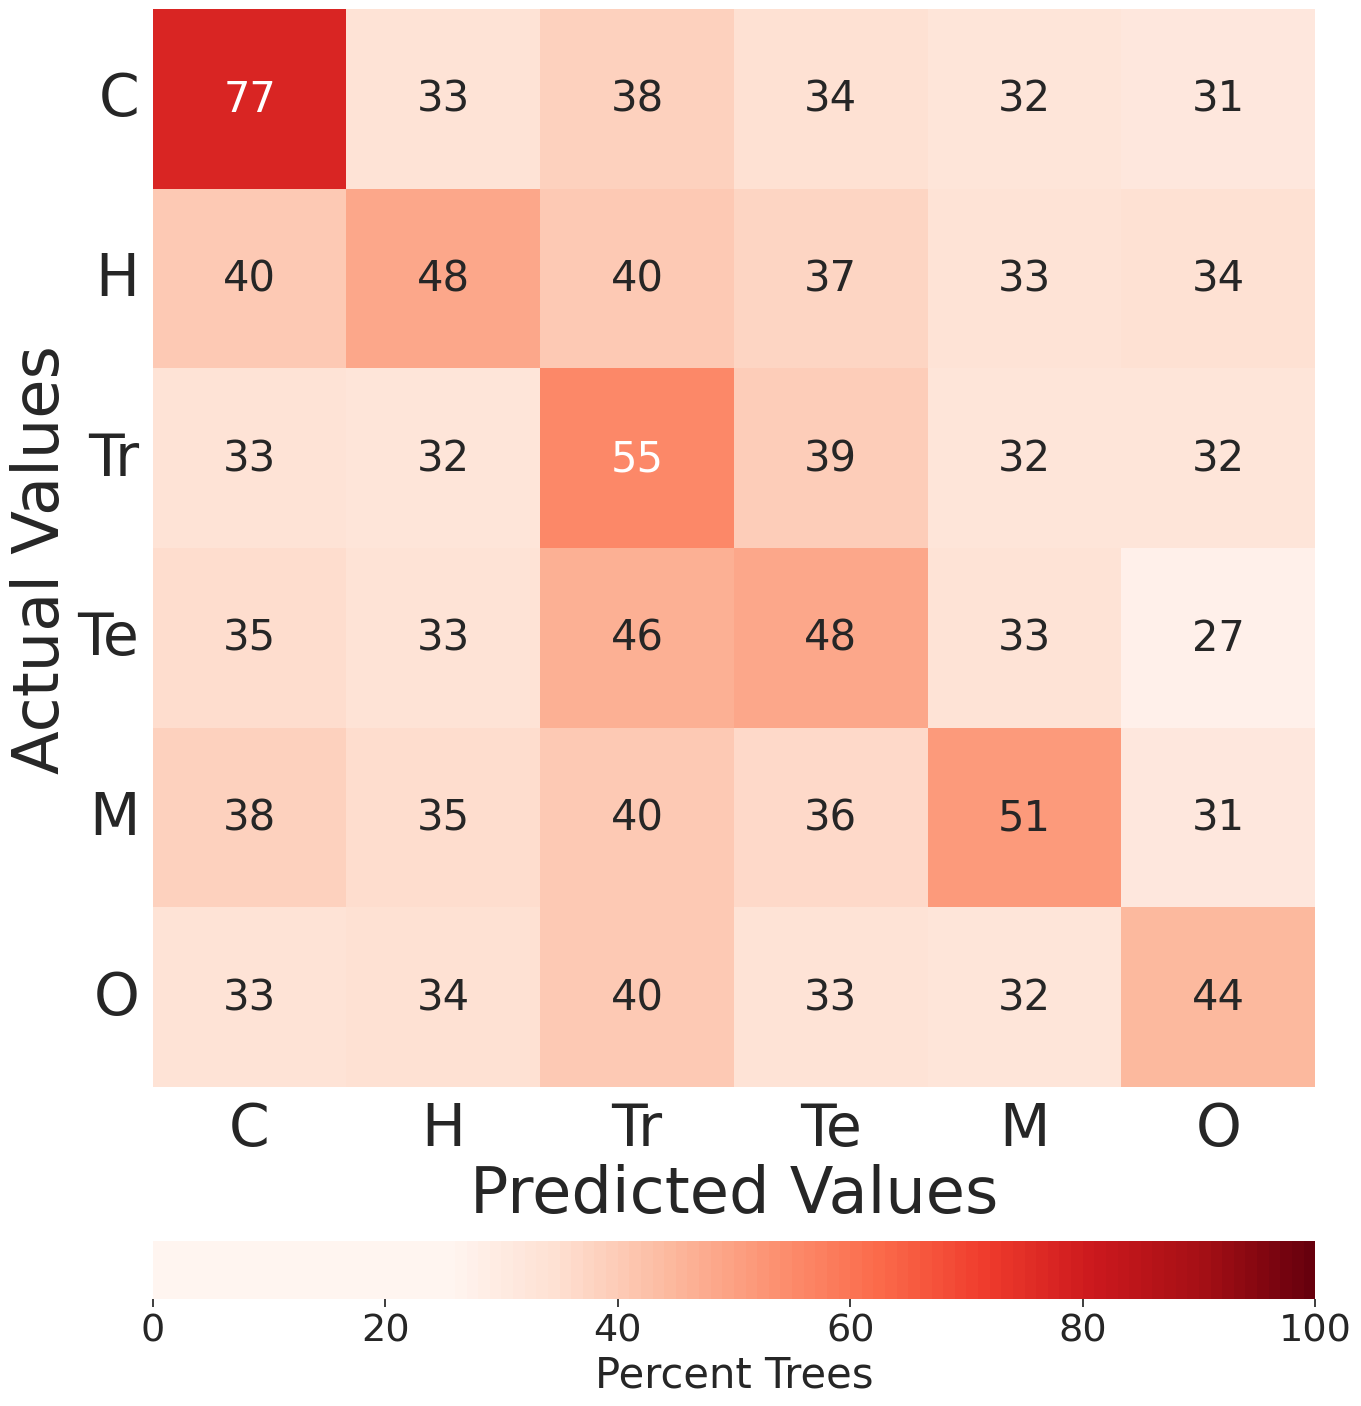

In [23]:
plt.rcParams['pdf.fonttype'] = 'truetype'
sn.set(font_scale=2.5)
rf_diff_obj.show_cm_and_uncertianty_individual_prediction(savefigure=False, reset_output_df = False, 
                                                         figure_path = ['Figures/Figure 3/fig3_individual_prediction_accuracy.pdf', 
                                                                   'Figures/Figure 3/fig3_individual_prediction_confidence.pdf'])

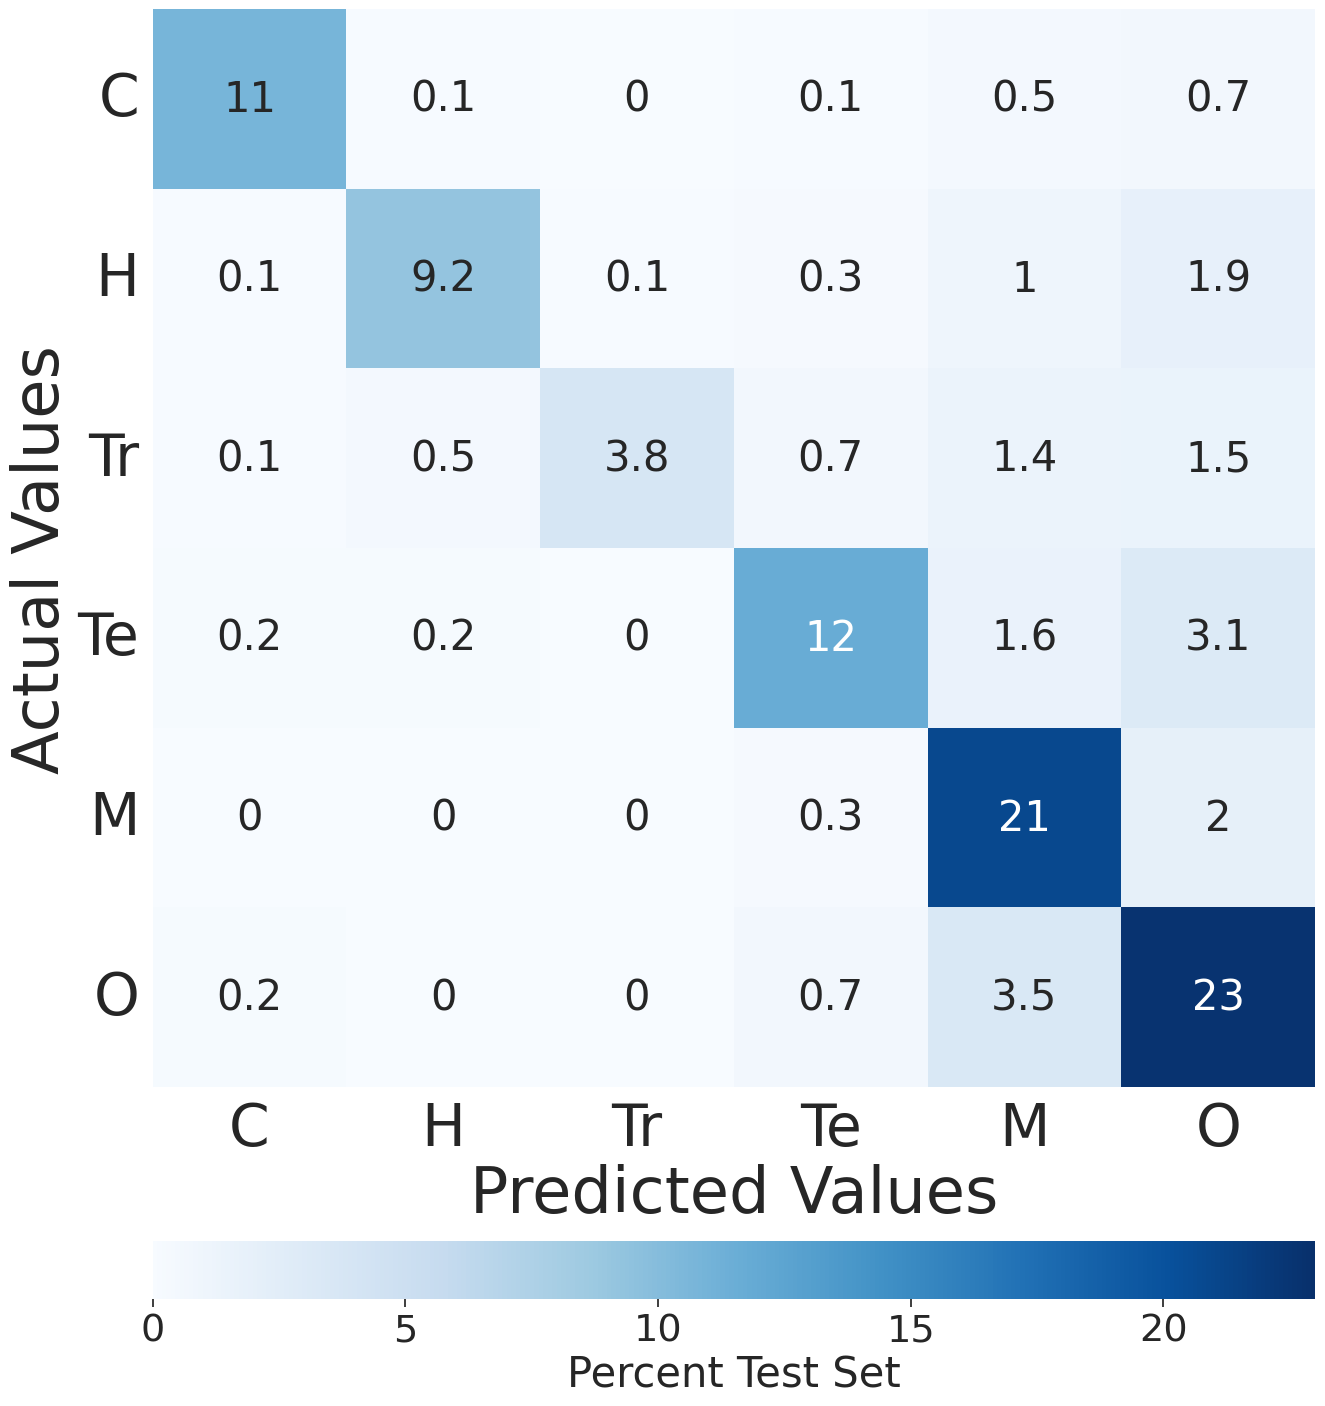

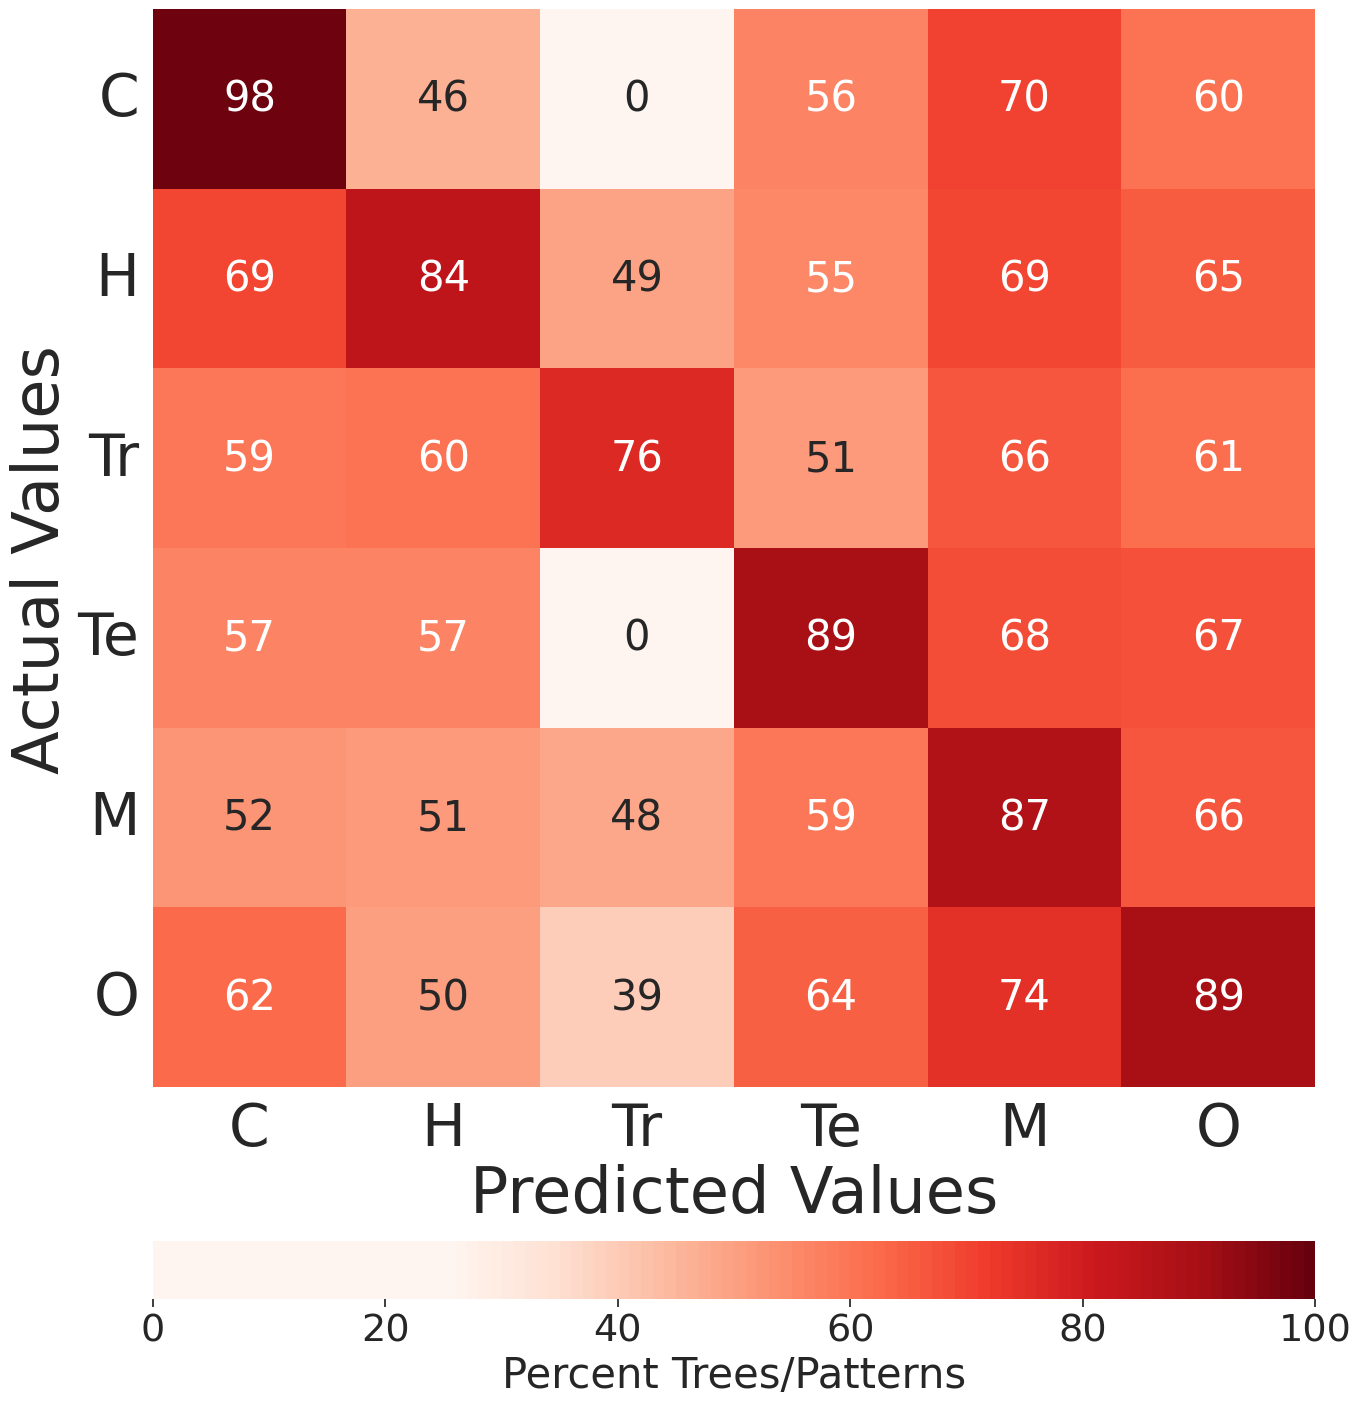

In [24]:
plt.rcParams['pdf.fonttype'] = 'truetype'
sn.set(font_scale=2.5)
rf_diff_obj.show_aggregate_confusion_matrix(show_individual = False, savefigure = False, 
                                              filenames = ['Figures/Figure 3/10_pattern_fig3_aggregate_prediction_accuracy',
                                                            'Figures/Figure 3/10_pattern_fig3_aggregate_prediction_confidence'],
                                           save_cm = False)

<font size="6"> Figure 5, S6, S7

<font size="5"> Individual Patterns

<font size="4"> Crystal System

In [29]:
crystal_sys_alph = ['cubic', 'hexagonal', 'trigonal', 'tetragonal', 'monoclinic', 'orthorhombic']

with open('df_cm_percent_unrounded.pkl', 'rb') as f:
    df_cm = pickle.load(f)
    
trues = []
print('Sensitivity')
for i in range(0, len(np.asarray(df_cm))):
    print(crystal_sys_alph[i] + ' ' + str(np.asarray(df_cm)[i][i]/sum(np.asarray(df_cm)[i])))
    
print('True Positive Rate')
trues = []
for i in range(0, len(np.asarray(df_cm))):
    print(crystal_sys_alph[i] + ' ' + str(np.asarray(df_cm)[i][i]/sum(np.asarray(df_cm).T[i])))

Sensitivity
cubic 0.8623599163330262
hexagonal 0.5812387318232992
trigonal 0.6935343431333167
tetragonal 0.7395169701194799
monoclinic 0.6099508362354229
orthorhombic 0.36383928016912653
True Positive Rate
cubic 0.9232859766013449
hexagonal 0.7805331889843696
trigonal 0.6230406146026326
tetragonal 0.5659680831043485
monoclinic 0.7042884018301169
orthorhombic 0.8583958504278514


<font size="4"> Lattice

a
Median All 0.02999999999999936
0.9427870646996105


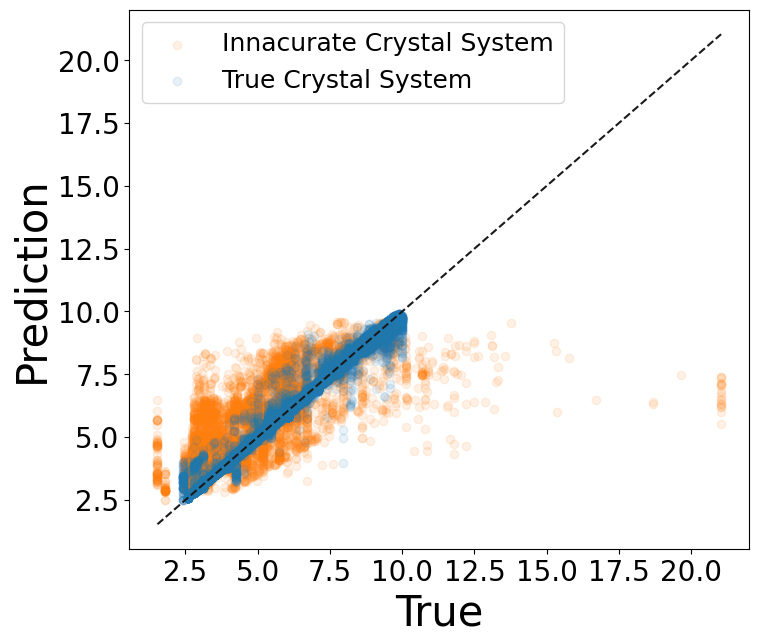

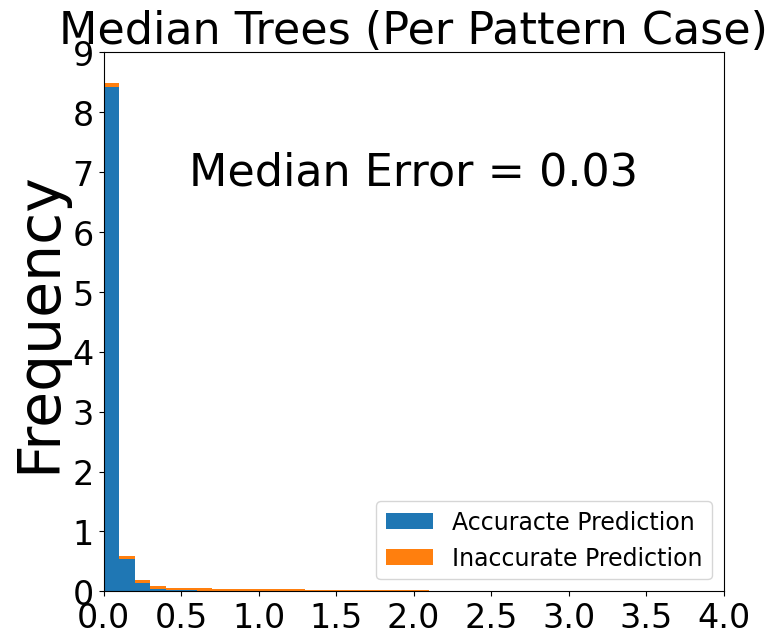

b
Median All 0.02999999999999936
0.9424613947707706


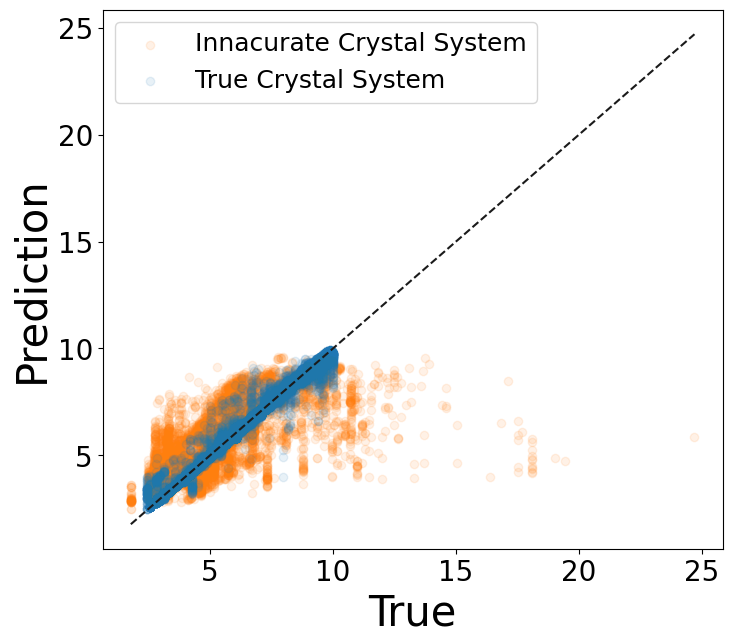

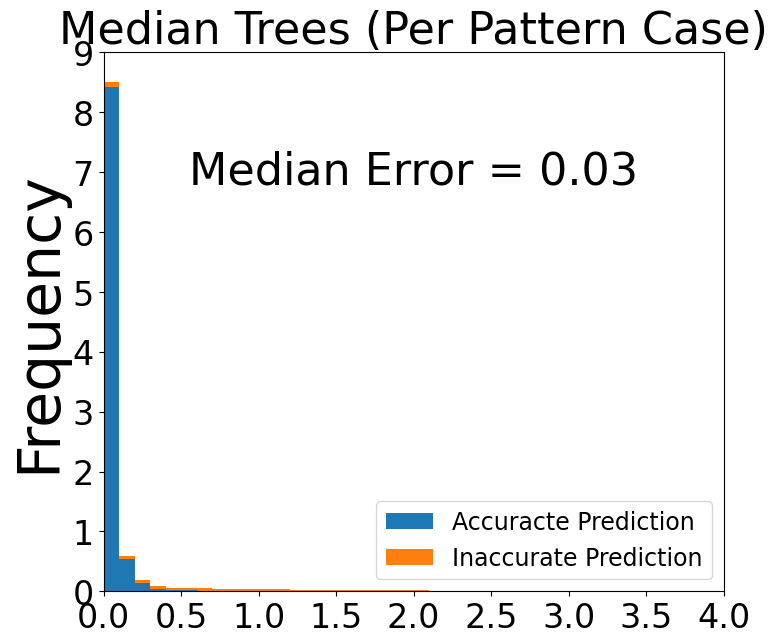

c
Median All 0.02999999999999936
0.6588207026701036


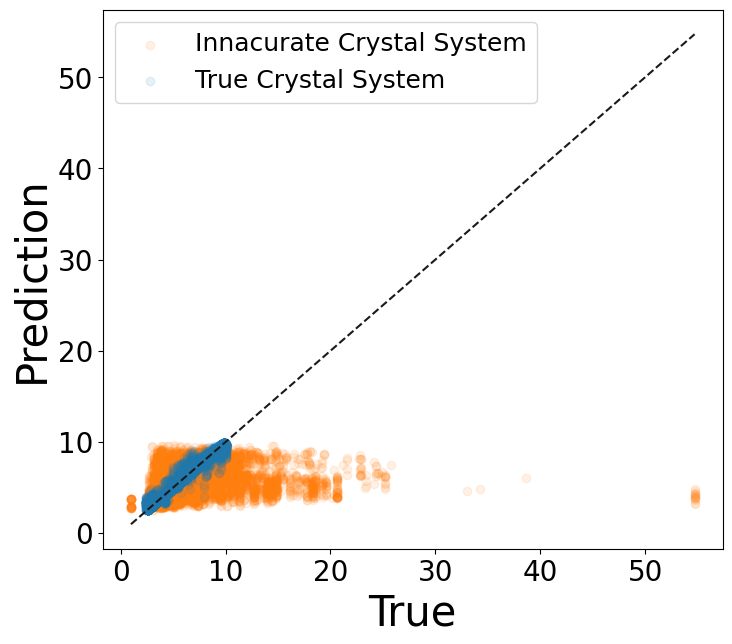

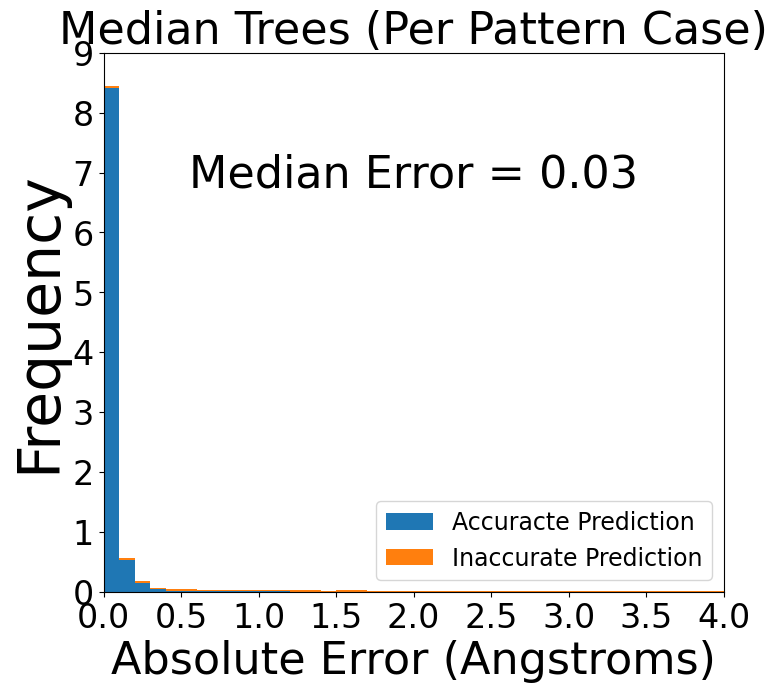

a
Median All 0.1200000000000001
0.8473841651197469


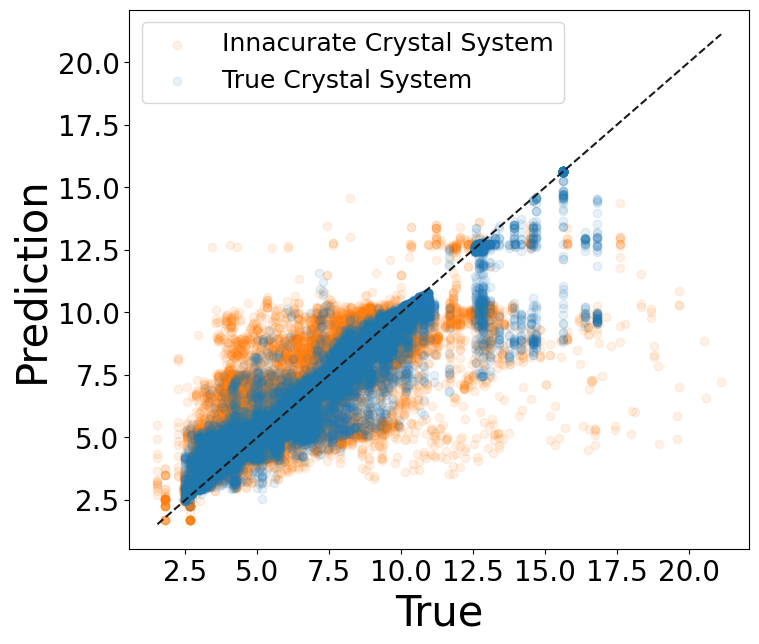

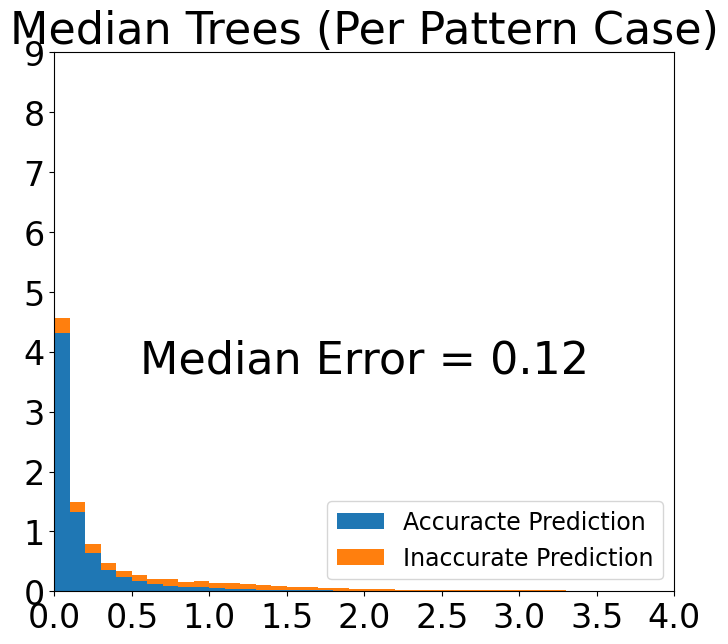

b
Median All 0.1200000000000001
0.7680488791153836


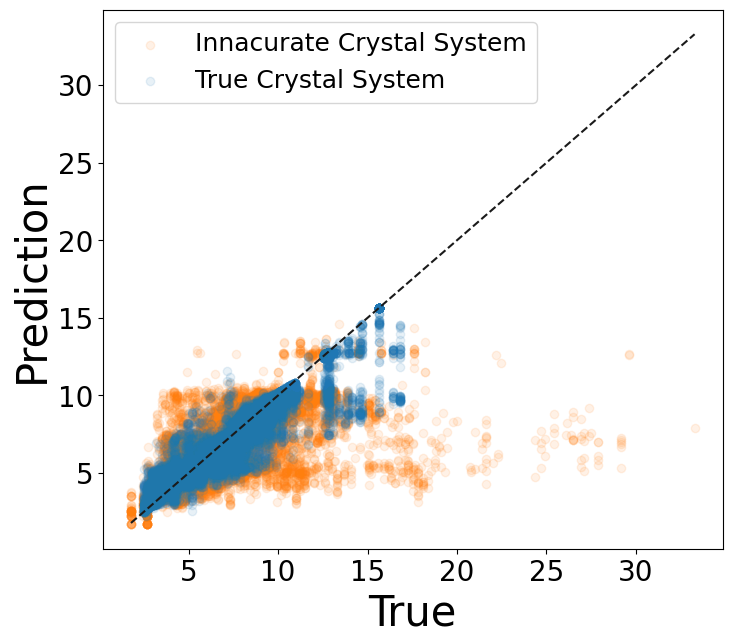

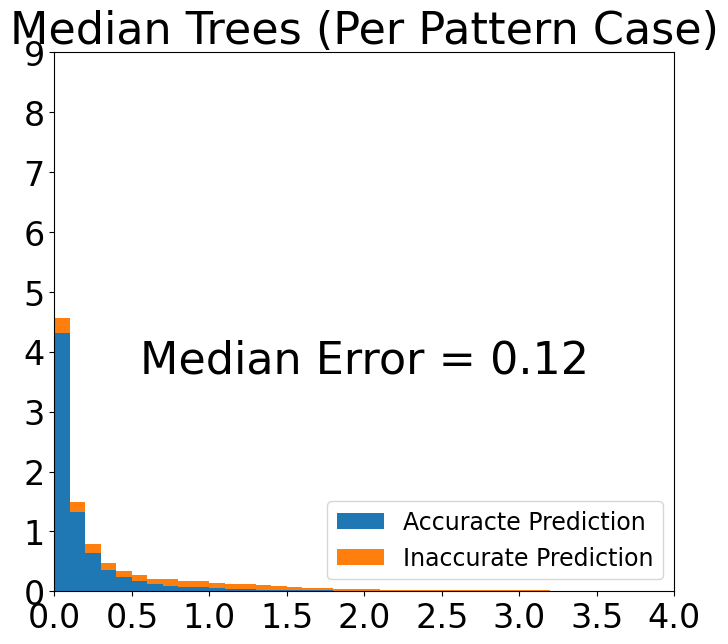

c
Median All 0.25500000000000034
0.5418827019291875


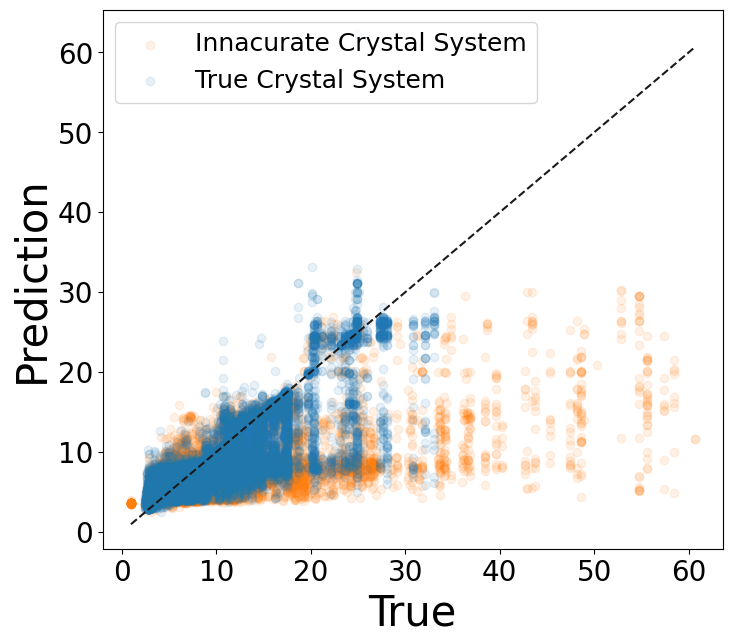

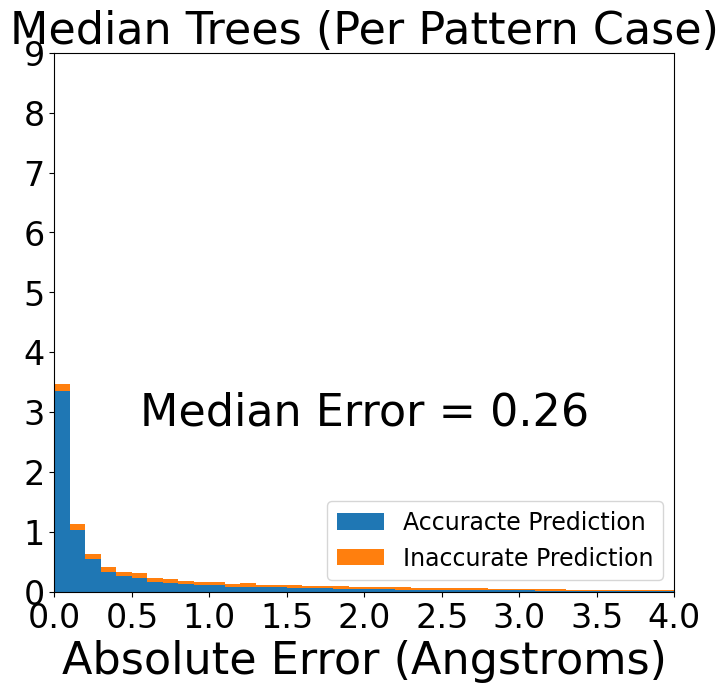

a
Median All 0.09000000000000075
0.828954419203231


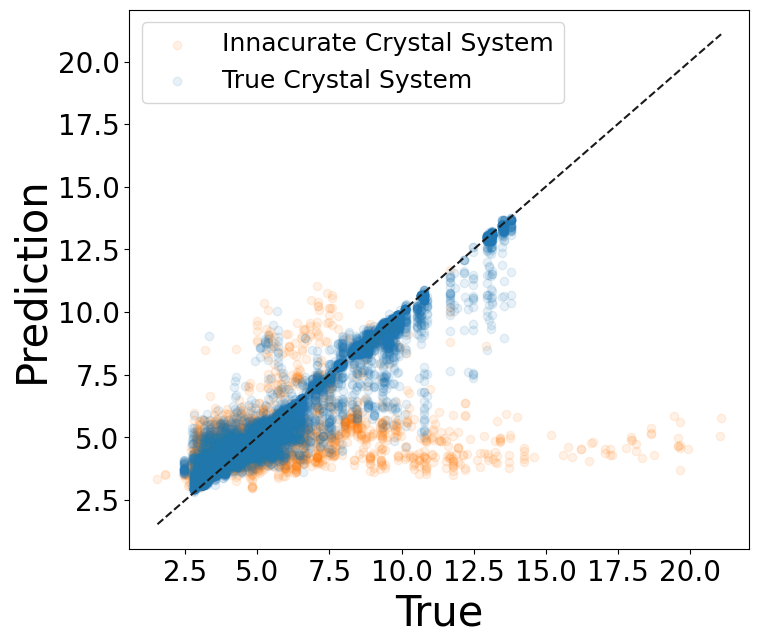

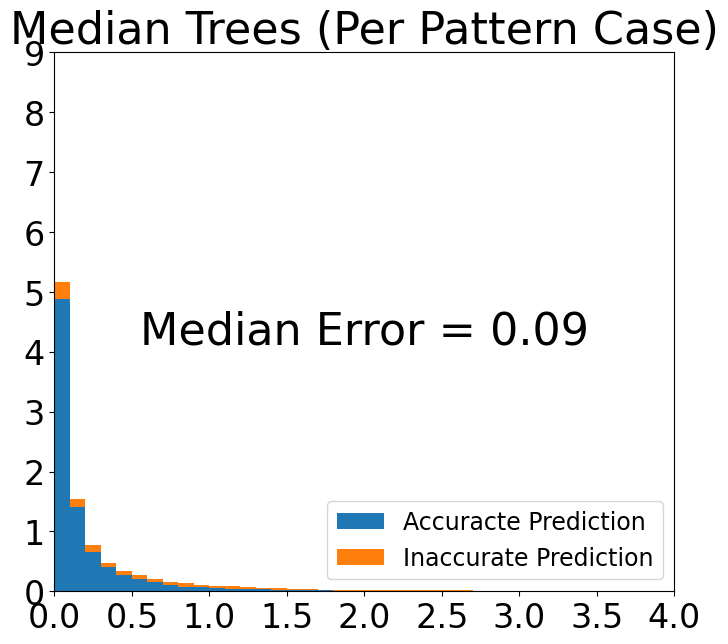

b
Median All 0.09000000000000075
0.8464694000115909


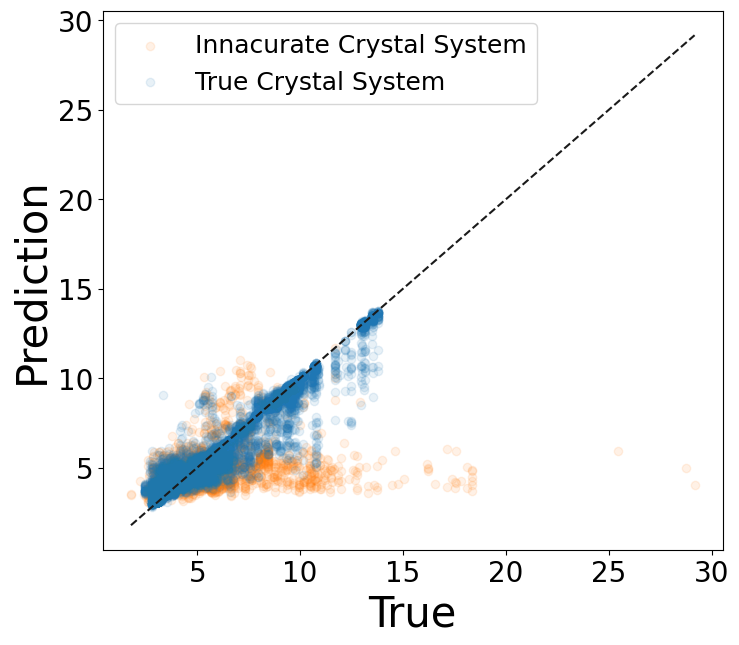

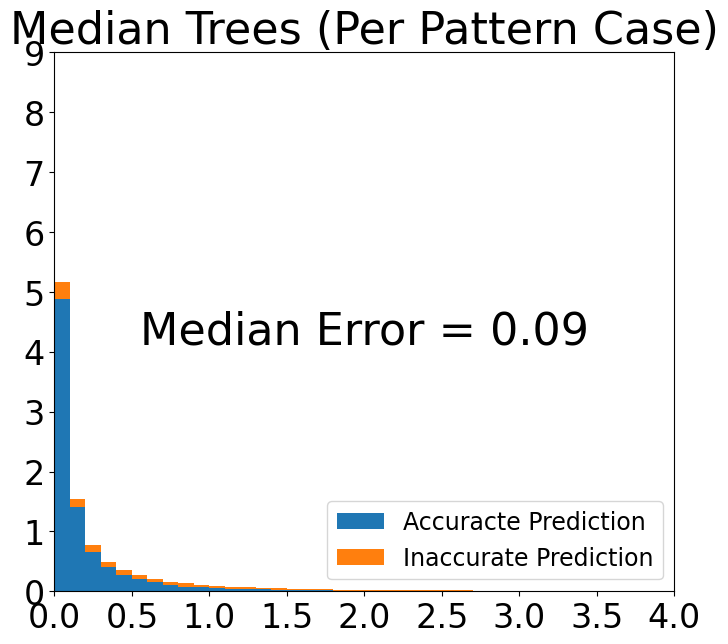

c
Median All 0.5950000000000006
0.7796042052381182


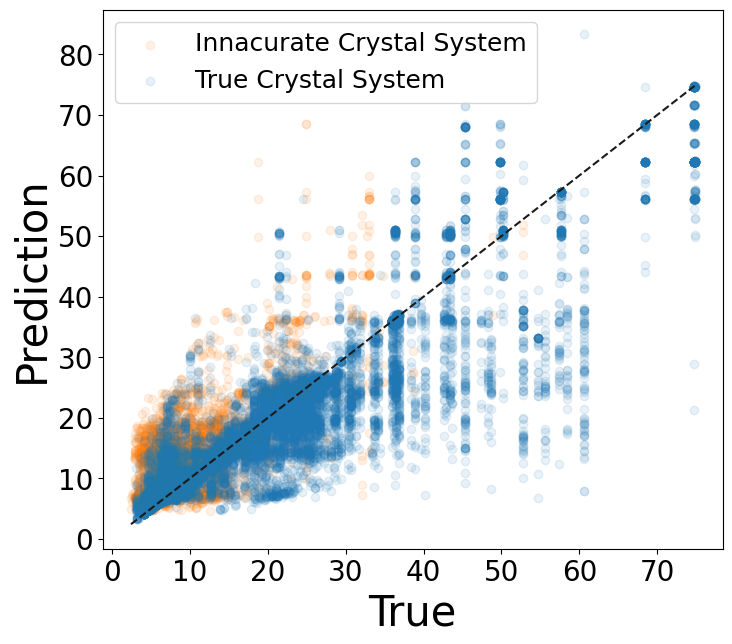

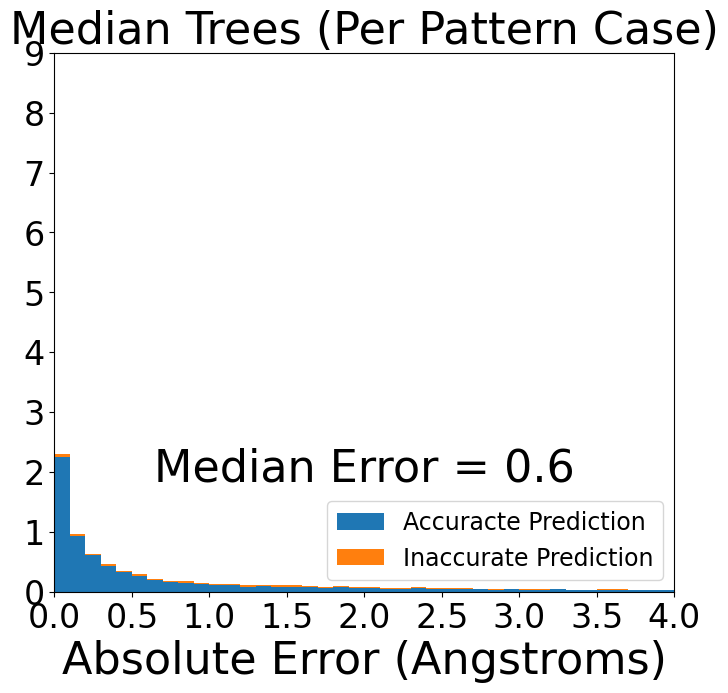

a
Median All 0.13000000000000078
0.6730420427327635


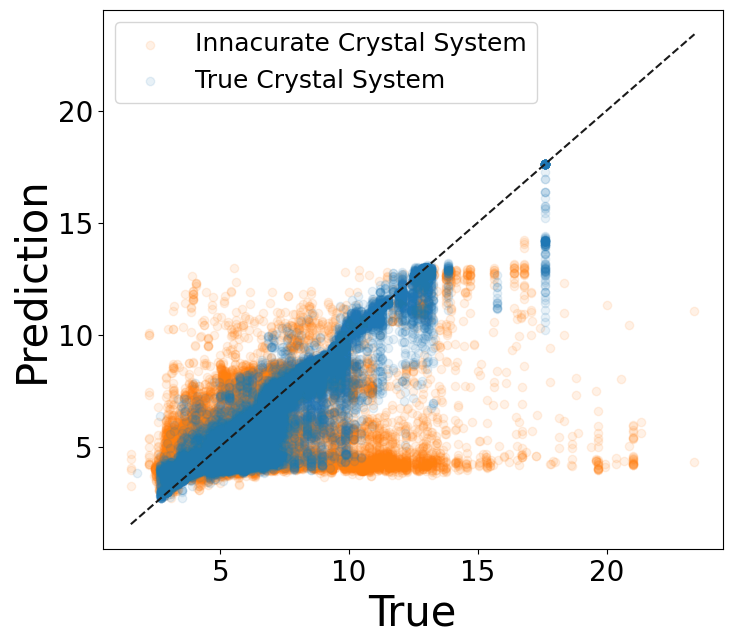

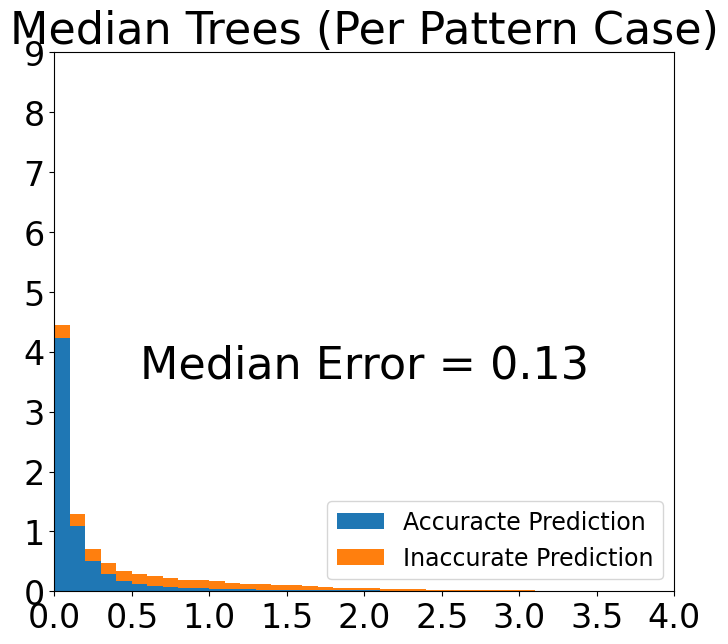

b
Median All 0.1299999999999999
0.5604619581660555


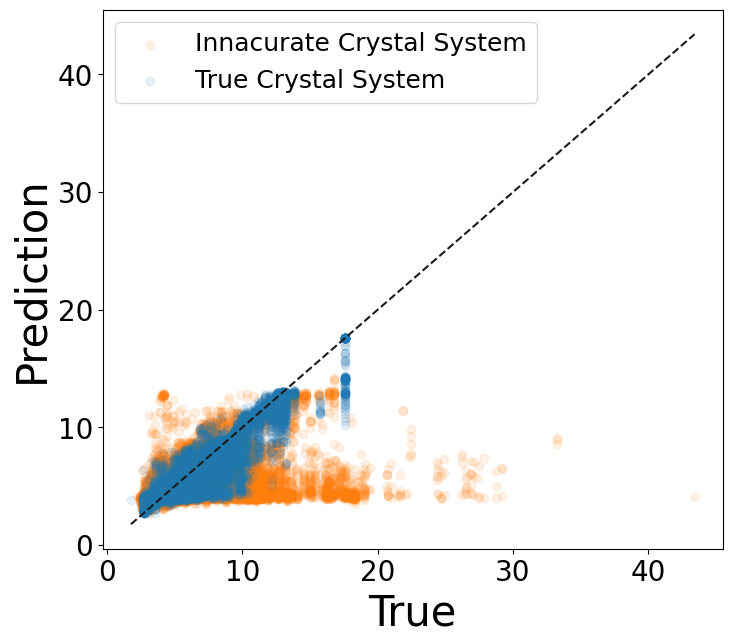

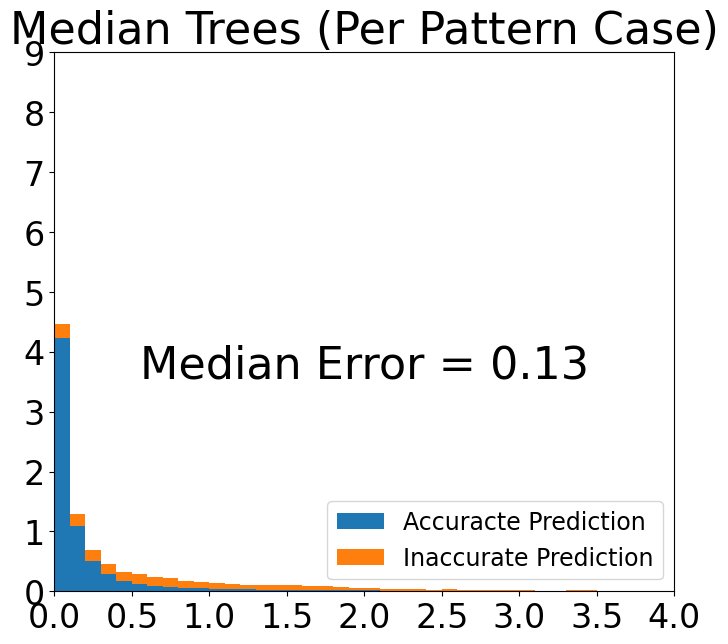

c
Median All 0.5400000000000009
0.4972019050241645


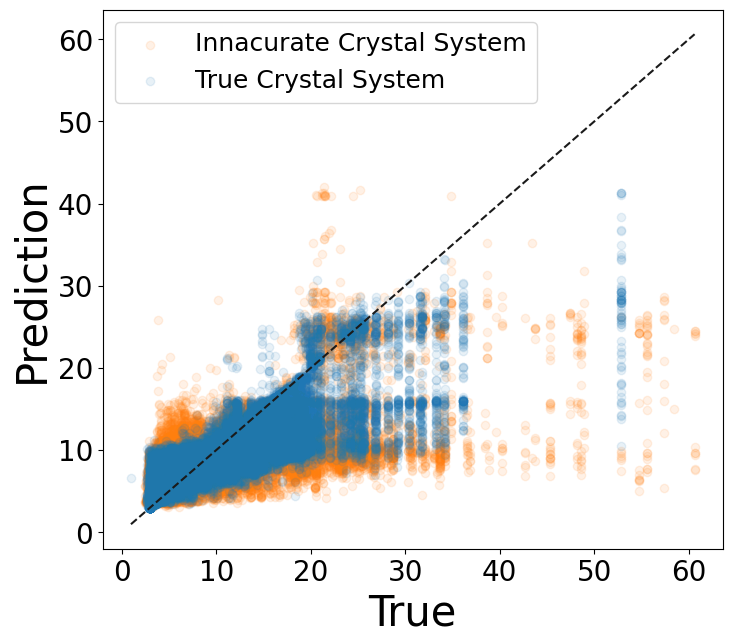

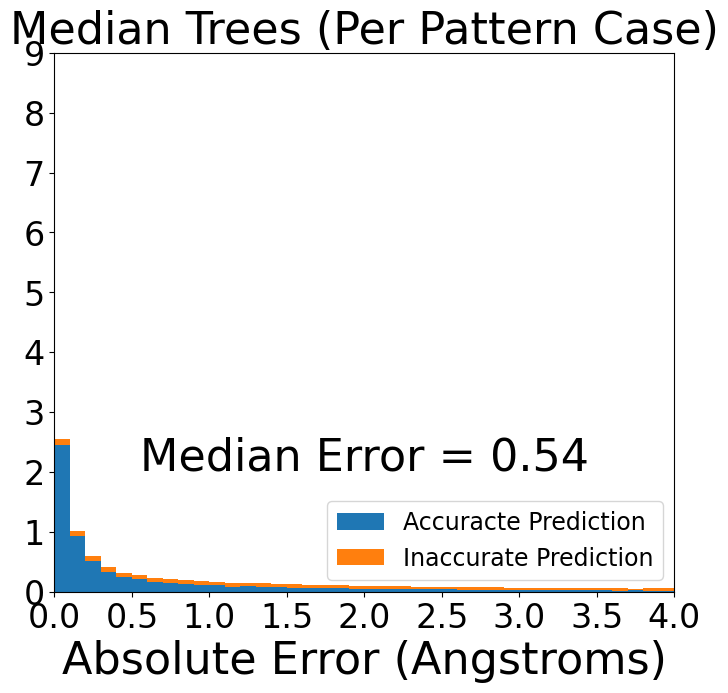

a
Median All 0.6100000000000003
-0.11566624855498997


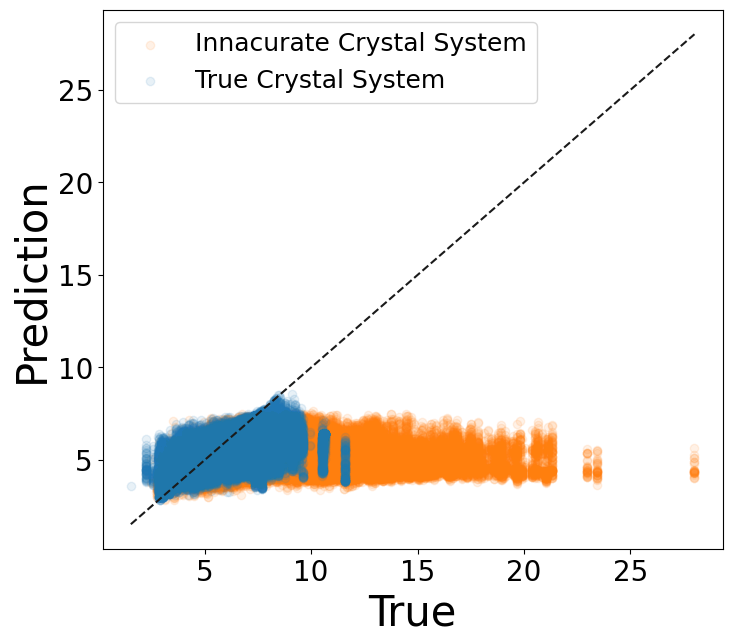

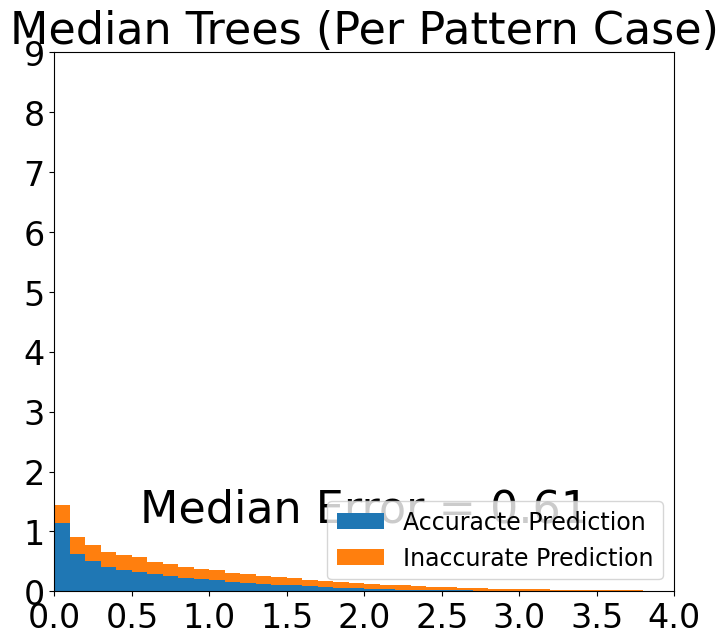

b
Median All 0.7649999999999997
-0.026510475456955618


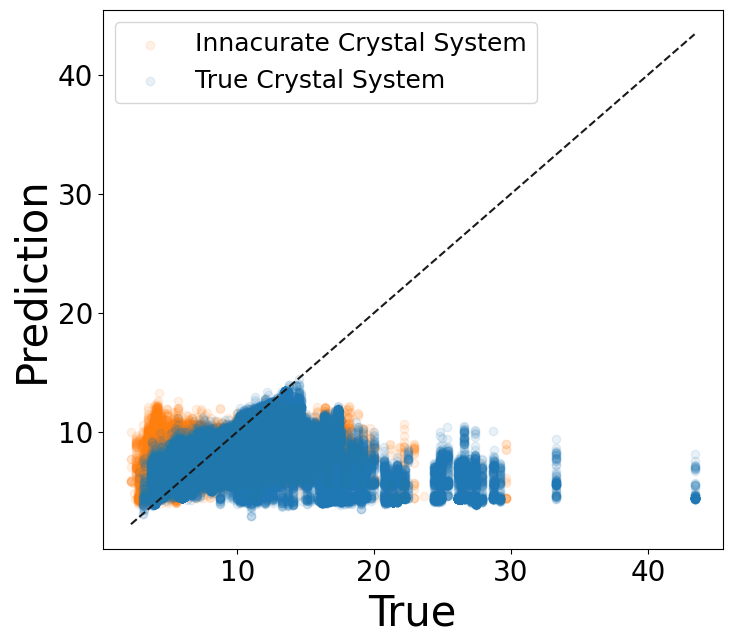

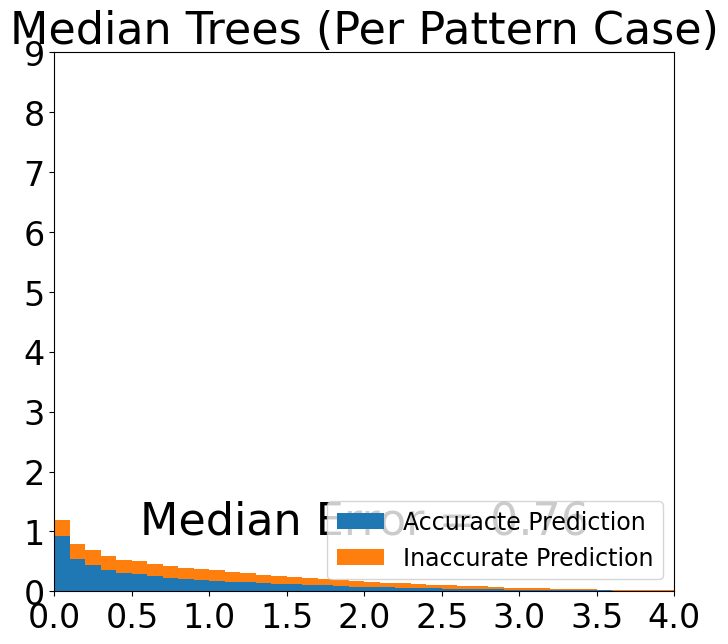

c
Median All 1.3650000000000002
0.03471008035353251


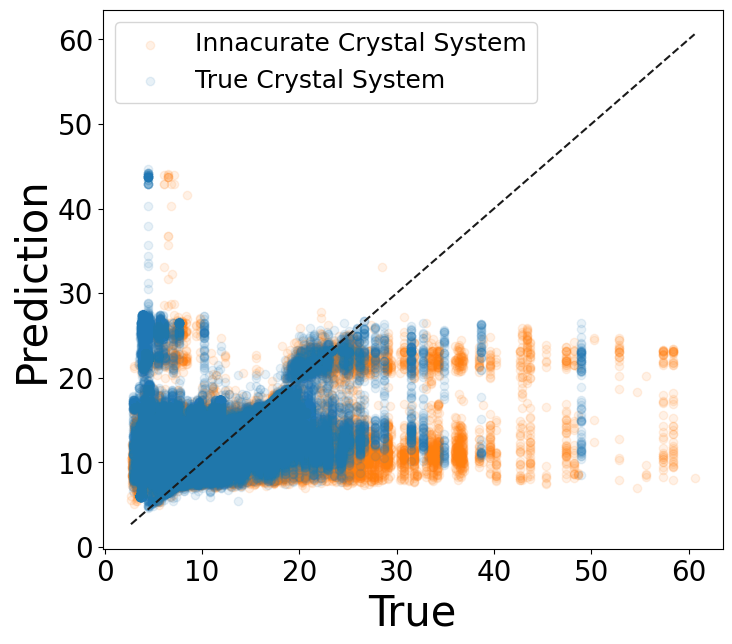

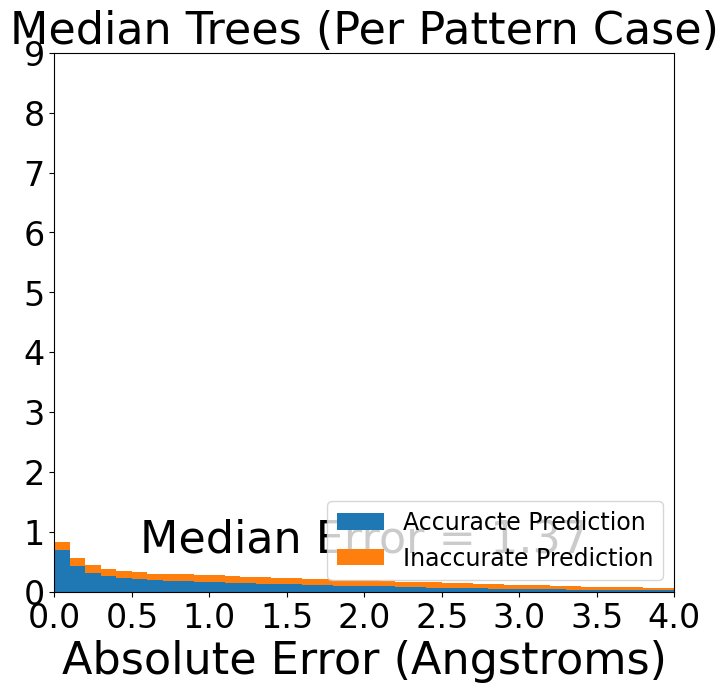

a
Median All 1.2449999999999992
0.2872945917489411


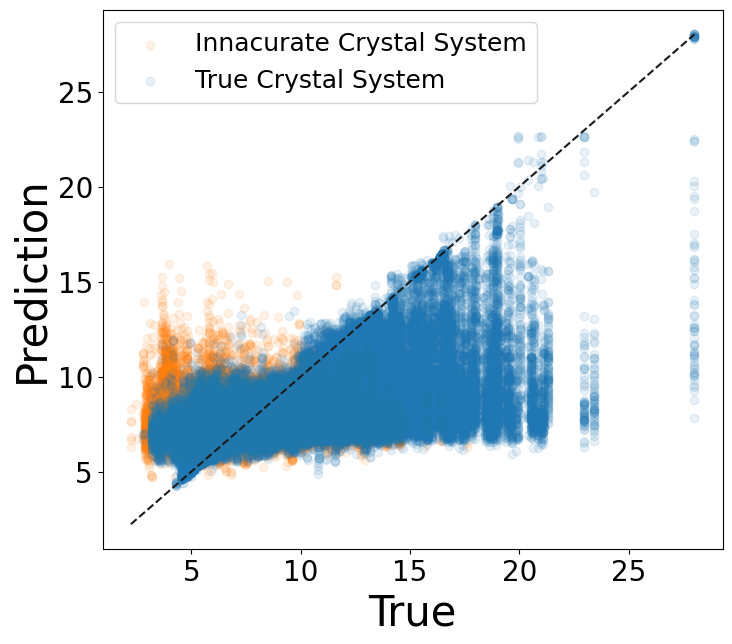

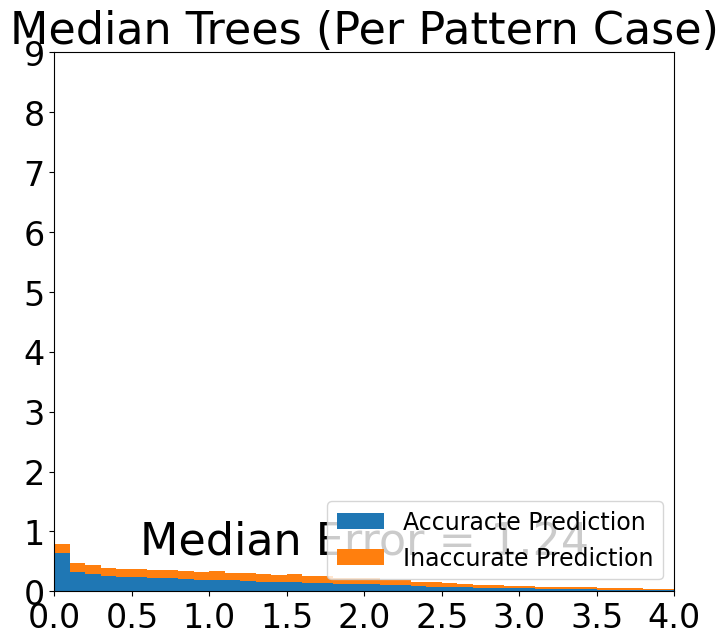

b
Median All 1.1050000000000004
0.3060931056307794


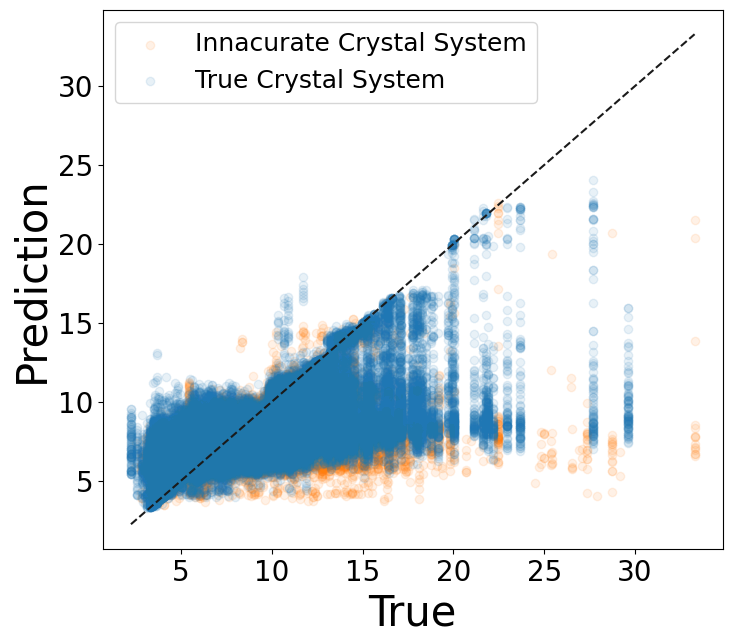

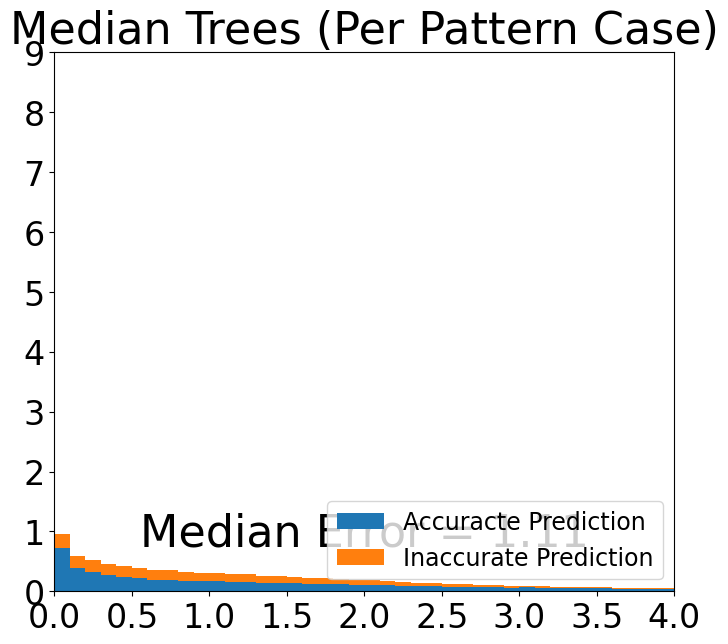

c
Median All 1.4749999999999996
0.1232807649501303


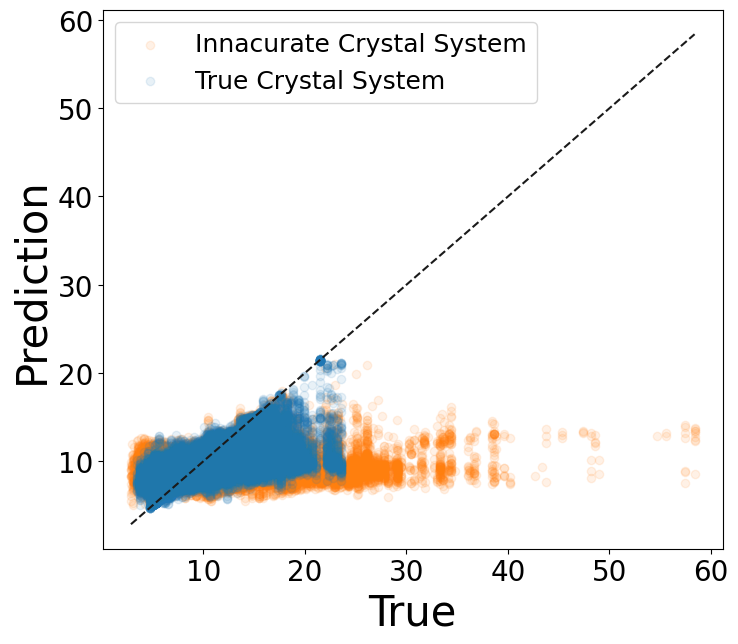

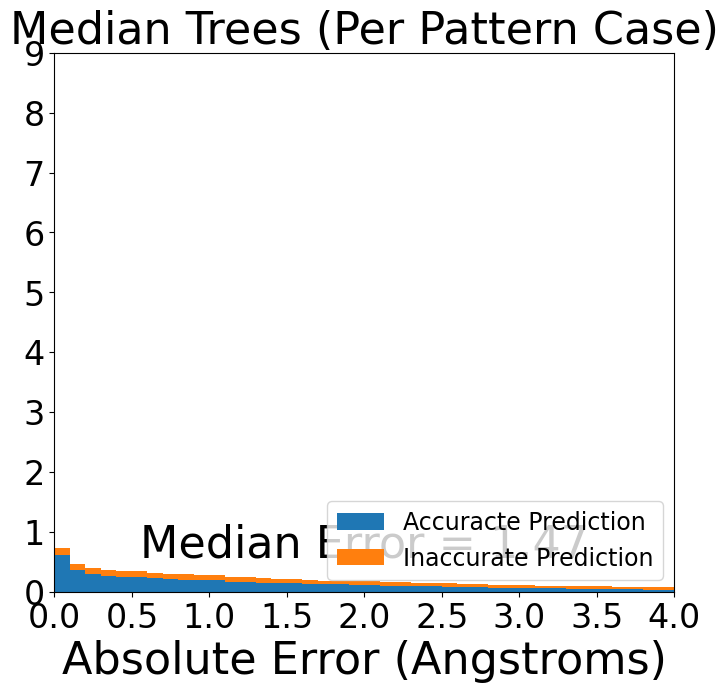

In [30]:
for cry_sys in ['cubic', 'hexagonal', 'trigonal', 'tetragonal', 'orthorhombic', 'monoclinic']:
    print(cry_sys)
    for pred_type in ['Median']:
        median_errors = rf_diff_obj.visualize_lattice_results_individual(cry_sys, cry_sys_type = 'Predictions Crystal System', 
                                                             prediction_type = pred_type, show_hists = True, show_r2 = True,  savefig=False,
                                                                         update_output_df_with_lattice = False, load_lattice_output_df_from_path = False, 
                                                                         savenp = False, output_df_path = 'output_df.joblib')

<font size="4"> Space Group

In [31]:
rf_diff_obj.loaded_submodels_space_group = [False, '']
for cry_sys in ['cubic', 'hexagonal','trigonal','tetragonal', 'monoclinic', 'orthorhombic']:
    df = rf_diff_obj.show_individual_sg_predictions(cry_sys, use_only_correct_cry_sys=False)

starting
loaded dfs
3110
1037
cubic


[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=128)]: Done   3 out of 128 | elapsed:    0.2s remaining:    6.6s
[Parallel(n_jobs=128)]: Done  68 out of 128 | elapsed:    0.5s remaining:    0.4s
[Parallel(n_jobs=128)]: Done 128 out of 128 | elapsed:    0.6s finished


Accurate Accuracy
0.933408929206688
Inaccurate Accuracy
0.0
All Accuracy
0.8618028041795824
starting
loaded dfs
3239
1080
hexagonal


[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=128)]: Done   3 out of 128 | elapsed:    0.1s remaining:    6.1s
[Parallel(n_jobs=128)]: Done  68 out of 128 | elapsed:    0.4s remaining:    0.4s
[Parallel(n_jobs=128)]: Done 128 out of 128 | elapsed:    0.5s finished


Accurate Accuracy
0.8352503702769987
Inaccurate Accuracy
0.0
All Accuracy
0.6519413117536372
starting
loaded dfs
2046
682
trigonal


[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=128)]: Done   3 out of 128 | elapsed:    0.1s remaining:    2.7s
[Parallel(n_jobs=128)]: Done  68 out of 128 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=128)]: Done 128 out of 128 | elapsed:    0.2s finished


Accurate Accuracy
0.8300305786108574
Inaccurate Accuracy
0.0
All Accuracy
0.7124936083177092
starting
loaded dfs
4311
1437
tetragonal


[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=128)]: Done   3 out of 128 | elapsed:    0.5s remaining:   19.2s
[Parallel(n_jobs=128)]: Done  68 out of 128 | elapsed:    1.2s remaining:    1.1s
[Parallel(n_jobs=128)]: Done 128 out of 128 | elapsed:    1.6s finished


Accurate Accuracy
0.7662358258663072
Inaccurate Accuracy
0.0
All Accuracy
0.5396515134591757
starting
loaded dfs
5961
1988
monoclinic


[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=128)]: Done   3 out of 128 | elapsed:    0.3s remaining:   14.4s
[Parallel(n_jobs=128)]: Done  68 out of 128 | elapsed:    0.9s remaining:    0.8s
[Parallel(n_jobs=128)]: Done 128 out of 128 | elapsed:    1.4s finished


Accurate Accuracy
0.6471069770137425
Inaccurate Accuracy
0.0
All Accuracy
0.4031739010728616
starting
loaded dfs
6975
2325
orthorhombic


[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=128)]: Done   3 out of 128 | elapsed:    1.1s remaining:   44.5s
[Parallel(n_jobs=128)]: Done  68 out of 128 | elapsed:    2.1s remaining:    1.8s
[Parallel(n_jobs=128)]: Done 128 out of 128 | elapsed:    2.8s finished


Accurate Accuracy
0.5470361048932395
Inaccurate Accuracy
0.0
All Accuracy
0.309605001887195


<font size="5"> Aggregate Patterns

<font size="4"> Crystal System

In [32]:
with open('cm_ag_percent.pkl', 'rb') as f:
    df_cm = pickle.load(f)

trues = []
print('True Positive Rate')
for i in range(0, len(np.asarray(df_cm))):
    print(crystal_sys_alph[i] + ' ' + str(np.asarray(df_cm)[i][i]/sum(np.asarray(df_cm).T[i])))
    
trues = []
print('Sensitivity')
for i in range(0, len(np.asarray(df_cm))):
    print(crystal_sys_alph[i] + ' ' + str(np.asarray(df_cm)[i][i]/sum(np.asarray(df_cm)[i])))

True Positive Rate
cubic 0.9473684210526317
hexagonal 0.92
trigonal 0.9743589743589743
tetragonal 0.8478260869565217
monoclinic 0.7231833910034602
orthorhombic 0.7115987460815048
Sensitivity
cubic 0.8852459016393444
hexagonal 0.7301587301587301
trigonal 0.475
tetragonal 0.6964285714285714
monoclinic 0.9008620689655172
orthorhombic 0.8376383763837638


<font size="4"> Lattice

In [ ]:
rf_diff_obj.loaded_submodels_space_group = [False, '']
for cry_sys in ['cubic', 'hexagonal', 'trigonal', 'tetragonal', 'orthorhombic', 'monoclinic']:
    rf_diff_obj.visualize_space_group_results_aggregate(cry_sys)

starting
loaded dfs
3110
1037
922
starting input processing


[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=128)]: Done   3 out of 128 | elapsed:    0.2s remaining:    8.1s
[Parallel(n_jobs=128)]: Done  68 out of 128 | elapsed:    0.5s remaining:    0.4s
[Parallel(n_jobs=128)]: Done 128 out of 128 | elapsed:    0.6s finished


starting aggregation
Accurate Accuracy
0.9501084598698482
Inaccurate Accuracy
0.0
All Accuracy
0.8975409836065574
starting
loaded dfs
3239
1080
787
starting input processing


<font size="4"> Space Group

In [ ]:
for cry_sys in ['cubic', 'hexagonal', 'trigonal', 'tetragonal', 'orthorhombic', 'monoclinic']:
    print(cry_sys)
    plt.rcParams['pdf.fonttype'] = 'truetype'
    df = rf_diff_obj.visualize_lattice_results_aggregate(cry_sys, cry_sys_type = 'Aggregate Predictions Crystal System', 
                                                             prediction_type = 'Median', show_hists = True, show_r2 = True, 
                                                         savefig = False, savenp = False)

<font size="6"> Figure 6

In [ ]:
mpl.style.use('default')
for param in ['a', 'b', 'c']:
    for cry_sys in ['cubic', 'hexagonal', 'trigonal', 'tetragonal', 'orthorhombic', 'monoclinic']:
        output_set = np.load('lattice_numpy_arrays/Aggregate_pattern/10_aggregate_'+cry_sys+'_'+param+'.npy', allow_pickle=True)
        true_val_acc = output_set[0]
        median_per_pattern_acc = output_set[1]
        true_val_inacc = output_set[2]
        median_per_pattern_inacc = output_set[3]
        # plt.figure(figsize=(8, 7))
        # plt.scatter(true_val_inacc, median_per_pattern_inacc, alpha = 0.1, label = "Innacurate Crystal System",
        #            color = '#FF7F0E')
        # plt.scatter(true_val_acc, median_per_pattern_acc, alpha = 0.1, label = 'True Crystal System',
        #            color = '#1F77B4')
        # plt.plot(np.linspace(min(true_val_inacc), max(true_val_inacc), 100),
        #          np.linspace(min(true_val_inacc), max(true_val_inacc), 100), linestyle = '--', color = 'k')
        # plt.yticks(fontsize=20)
        # plt.xticks(fontsize = 20)
        # plt.xlabel('True', fontsize = 30)
        # plt.ylabel('Prediction', fontsize = 30)
        # plt.legend(fontsize = 18)
        # plt.show()
        if param == 'a':
            rmax=20
        if param == 'b':
            rmax=20
        if param == 'c':
            rmax=30
        if param in ['a','b']:
            if cry_sys == 'cubic':
                scale_saturation = (5.0, 20.0)
            if cry_sys == 'hexagonal':
                scale_saturation = (15.0, 30.0)
            if cry_sys == 'trigonal':
                scale_saturation = (25.0, 25.0)
            if cry_sys == 'tetragonal':
                scale_saturation = (30.0, 25.0)
            if cry_sys == 'orthorhombic':
                scale_saturation = (10.0, 10.0)
            if cry_sys == 'monoclinic':
                scale_saturation = (15.0, 10.0)
                
        if param in ['c']:
            if cry_sys == 'cubic':
                scale_saturation = (5.0, 25.0)
            if cry_sys == 'hexagonal':
                scale_saturation = (30, 25.0)
            if cry_sys == 'trigonal':
                scale_saturation = (25.0, 25.0)
            if cry_sys == 'tetragonal':
                scale_saturation = (27.5, 25.0)
            if cry_sys == 'orthorhombic':
                scale_saturation = (20.0, 20.0)
            if cry_sys == 'monoclinic':
                scale_saturation = (20.0, 20.0)
        fig,ax = plot_hist_2D(
                true_val_acc,
                median_per_pattern_acc,
                true_val_inacc,
                median_per_pattern_inacc,
                figsize = (8, 7),
                r_max = rmax,
                scale_saturation = scale_saturation,
                title=cry_sys+' '+param,
                dr=0.05,
                r_sigma=0.1
                )
        
        plt.rcParams['pdf.fonttype'] = 'truetype'
        # fig.savefig('Individual Pattern '+cry_sys+' '+param+'.pdf', bbox_inches="tight")

<font size="6"> Figure S1

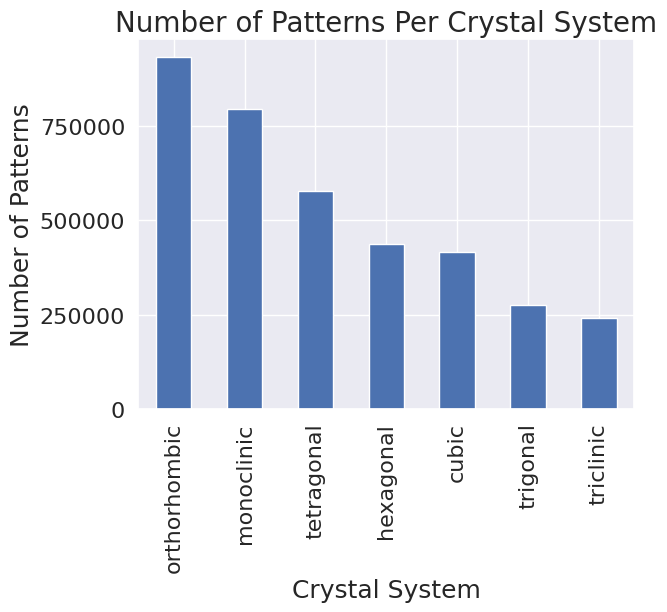

In [26]:
rf_diff_obj.show_distributions()

<font size="6"> Figure S3

<font size="4"> Individual Pattern

In [ ]:
warnings.filterwarnings('ignore')
systems = ['orthorhombic', 'monoclinic', 'tetragonal', 'hexagonal', 'cubic',  'trigonal']
percentages_false_pos = []

for cry_sys in systems:
    predicted_cry_sys = rf_diff_obj.output_df.loc[rf_diff_obj.output_df['Predictions Crystal System']== cry_sys]
    
    false_positives = rf_diff_obj.output_df.loc[(rf_diff_obj.output_df['Predictions Crystal System'] == cry_sys) & 
                                                                           (rf_diff_obj.output_df['True Values Crystal System'] != cry_sys)]
    
    false_pos_rate = len(false_positives)/len(predicted_cry_sys)
    print(cry_sys + ' ' + str(false_pos_rate))
    percentages_false_pos.append(false_pos_rate)

vals = np.asarray(rf_diff_obj.output_df['True Values Crystal System'].value_counts())
vals = vals/sum(vals)
vals = vals*100

plot_set = []
for i in range(0, 6):
    plot_set.append([vals[i], percentages_false_pos[i], systems[i]])
for i in range(len(plot_set)):
    x = plot_set[i][0]
    y = plot_set[i][1]
    z = plot_set[i][2]
    plt.scatter(x, y)
    if z == 'cubic':
        plt.text(x -1, y - 0.03 , z.capitalize(), fontsize=12)
    elif z == 'orthorhombic':
        plt.text(x-3.75, y + 0.015 , z.capitalize(), fontsize=12)
    elif z == 'monoclinic':
        plt.text(x -1, y + 0.015 , z.capitalize(), fontsize=12)
    elif z == 'trigonal':
        plt.text(x-0.6, y + 0.015 , z.capitalize(), fontsize=12)
    else:
        plt.text(x-1, y + 0.015 , z.capitalize(), fontsize=12)
plt.ylabel('False Positive Rate', fontsize = 14)
plt.xlabel('Percentage of Dataset', fontsize = 14)
plt.ylim([-0.01,0.5])
plt.xlim([7.1, 28.9])
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Individual Pattern', fontsize = 18)
# plt.rcParams['pdf.fonttype'] = 'truetype'
# plt.savefig('Figures/Figure S3/Figure S3.pdf', bbox_inches="tight")
plt.show()

<font size="4"> 10 Pattern Aggregate

In [ ]:
warnings.filterwarnings('ignore')
systems = ['orthorhombic', 'monoclinic', 'tetragonal', 'hexagonal', 'cubic',  'trigonal']
percentages_false_pos = []

for cry_sys in systems:
    predicted_cry_sys = rf_diff_obj.condensed_output_df.loc[rf_diff_obj.condensed_output_df['Aggregate Predictions Crystal System']== cry_sys]
    
    false_positives = rf_diff_obj.condensed_output_df.loc[(rf_diff_obj.condensed_output_df['Aggregate Predictions Crystal System'] == cry_sys) & 
                                                                           (rf_diff_obj.condensed_output_df['True Values Crystal System'] != cry_sys)]
    
    false_pos_rate = len(false_positives)/len(predicted_cry_sys)
    print(cry_sys + ' ' + str(false_pos_rate))
    percentages_false_pos.append(false_pos_rate)

vals = np.asarray(rf_diff_obj.condensed_output_df['True Values Crystal System'].value_counts())
vals = vals/sum(vals)
vals = vals*100

plot_set = []
for i in range(0, 6):
    plot_set.append([vals[i], percentages_false_pos[i], systems[i]])
for i in range(len(plot_set)):
    x = plot_set[i][0]
    y = plot_set[i][1]
    z = plot_set[i][2]
    plt.scatter(x, y)
    if z == 'cubic':
        plt.text(x -1, y - 0.03 , z.capitalize(), fontsize=12)
    elif z == 'orthorhombic':
        plt.text(x-3.5, y + 0.025 , z.capitalize(), fontsize=12)
    elif z == 'monoclinic':
        plt.text(x -1, y + 0.015 , z.capitalize(), fontsize=12)
    elif z == 'trigonal':
        plt.text(x-0.6, y + 0.015 , z.capitalize(), fontsize=12)
    else:
        plt.text(x-1, y + 0.015 , z.capitalize(), fontsize=12)
plt.ylabel('False Positive Rate', fontsize = 14)
plt.xlabel('Percentage of Dataset', fontsize = 14)
plt.ylim([-0.01,0.5])
plt.xlim([7.1, 28.9])
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('10 Pattern Aggregate', fontsize = 18)
# plt.rcParams['pdf.fonttype'] = 'truetype'
# plt.savefig('Figures/Figure S3/ag Figure S3.pdf', bbox_inches="tight")
plt.show()

<font size="6"> Figure S4

<font size="4"> Individual Pattern

In [ ]:
for cry_sys in ['cubic', 'hexagonal', 'trigonal', 'tetragonal', 'orthorhombic', 'monoclinic']:
    cry_sys_df = rf_diff_obj.output_df.loc[rf_diff_obj.output_df['Predictions Crystal System'] == cry_sys]
    true_cry_sys_pred = cry_sys_df.loc[cry_sys_df['True Values Crystal System']==cry_sys]	
    wrong_pred = cry_sys_df.loc[cry_sys_df['True Values Crystal System']!=cry_sys]
    # plt.hist(cry_sys_df['Prediction Confidence'], bins=np.arange(0.15, 1.05, 0.05), facecolor = 'white', density = True)
    hist = plt.hist([np.asarray(true_cry_sys_pred['Confidence Crystal System']),np.asarray(wrong_pred['Confidence Crystal System'])], 
             bins=np.arange(0.15, 1.05, 0.05), stacked=True, label=['Accuracte Prediction', 'Inaccurate Prediction'], density = True)
    plt.legend(fontsize = 12)
    plt.title(cry_sys.capitalize(), fontsize = 16)
    plt.ylim([0,4.5])
    plt.ylabel('Percent Predicted', fontsize = 16)
    plt.xlabel('Prediction Confidence', fontsize = 16)
    mpl.style.use('default')
    plt.rcParams['pdf.fonttype'] = 'truetype'
    # plt.savefig('Figures/Figure S4/Figure S4 '+ cry_sys +'.pdf', bbox_inches="tight")
    plt.show()

<font size="4"> 10 Pattern Aggregate

In [ ]:
for cry_sys in ['cubic', 'hexagonal', 'trigonal', 'tetragonal', 'orthorhombic', 'monoclinic']:
    cry_sys_df = rf_diff_obj.condensed_output_df.loc[rf_diff_obj.condensed_output_df['Aggregate Predictions Crystal System'] == cry_sys]
    true_cry_sys_pred = cry_sys_df.loc[cry_sys_df['True Values Crystal System']==cry_sys]	
    wrong_pred = cry_sys_df.loc[cry_sys_df['True Values Crystal System']!=cry_sys]
    # plt.hist(cry_sys_df['Prediction Confidence'], bins=np.arange(0.15, 1.05, 0.05), facecolor = 'white', density = True)
    hist = plt.hist([np.asarray(true_cry_sys_pred['Prediction Confidence']),np.asarray(wrong_pred['Prediction Confidence'])], 
             bins=np.arange(0.15, 1.05, 0.05), stacked=True, label=['Accuracte Prediction', 'Inaccurate Prediction'], density = True)
    plt.legend(fontsize = 12)
    plt.title(cry_sys.capitalize(), fontsize = 16)
    plt.ylim([0,18])
    plt.ylabel('Percent Predicted', fontsize = 16)
    plt.xlabel('Prediction Confidence', fontsize = 16)
    mpl.style.use('default')
    plt.rcParams['pdf.fonttype'] = 'truetype'
    plt.savefig('Figures/Figure S4/10 ag Figure S4 '+ cry_sys +'.pdf', bbox_inches="tight")
    plt.show()

<font size="6"> Figure S5

In [ ]:
mpl.style.use('default')
for param in ['a', 'b', 'c']:
    for cry_sys in ['cubic', 'hexagonal', 'trigonal', 'tetragonal', 'orthorhombic', 'monoclinic']:
        output_set = np.load('lattice_numpy_arrays/Individual_pattern/individual_pattern_'+cry_sys+'_'+param+'.npy', allow_pickle=True)
        true_val_acc = output_set[0]
        median_per_pattern_acc = output_set[1]
        true_val_inacc = output_set[2]
        median_per_pattern_inacc = output_set[3]
        # plt.figure(figsize=(8, 7))
        # plt.scatter(true_val_inacc, median_per_pattern_inacc, alpha = 0.1, label = "Innacurate Crystal System",
        #            color = '#FF7F0E')
        # plt.scatter(true_val_acc, median_per_pattern_acc, alpha = 0.1, label = 'True Crystal System',
        #            color = '#1F77B4')
        # plt.plot(np.linspace(min(true_val_inacc), max(true_val_inacc), 100),
        #          np.linspace(min(true_val_inacc), max(true_val_inacc), 100), linestyle = '--', color = 'k')
        # plt.yticks(fontsize=20)
        # plt.xticks(fontsize = 20)
        # plt.xlabel('True', fontsize = 30)
        # plt.ylabel('Prediction', fontsize = 30)
        # plt.legend(fontsize = 18)
        # plt.show()
        if param == 'a':
            rmax=20
        if param == 'b':
            rmax=20
        if param == 'c':
            rmax=30
        if param in ['a','b']:
            if cry_sys == 'cubic':
                scale_saturation = (5.0, 20.0)
            if cry_sys == 'hexagonal':
                scale_saturation = (15.0, 30.0)
            if cry_sys == 'trigonal':
                scale_saturation = (25.0, 25.0)
            if cry_sys == 'tetragonal':
                scale_saturation = (30.0, 25.0)
            if cry_sys == 'orthorhombic':
                scale_saturation = (10.0, 10.0)
            if cry_sys == 'monoclinic':
                scale_saturation = (15.0, 10.0)
                
        if param in ['c']:
            if cry_sys == 'cubic':
                scale_saturation = (5.0, 25.0)
            if cry_sys == 'hexagonal':
                scale_saturation = (30, 25.0)
            if cry_sys == 'trigonal':
                scale_saturation = (25.0, 25.0)
            if cry_sys == 'tetragonal':
                scale_saturation = (27.5, 25.0)
            if cry_sys == 'orthorhombic':
                scale_saturation = (20.0, 20.0)
            if cry_sys == 'monoclinic':
                scale_saturation = (20.0, 20.0)
        fig,ax = plot_hist_2D(
                true_val_acc,
                median_per_pattern_acc,
                true_val_inacc,
                median_per_pattern_inacc,
                figsize = (8, 7),
                r_max = rmax,
                scale_saturation = scale_saturation,
                title=cry_sys+' '+param,
                dr=0.05,
                r_sigma=0.1
                )
        
        plt.rcParams['pdf.fonttype'] = 'truetype'
        # fig.savefig('Individual Pattern '+cry_sys+' '+param+'.pdf', bbox_inches="tight")

<font size="4"> In text values generated using confusion matricies 

In [12]:
# Confidence of inaccurate vs accurate predictions of individual patterns

inac_con = []
acc_con = []
for i in range(0, len(rf_diff_obj.output_df)):
    row = rf_diff_obj.output_df.iloc[i]
    if row['Predictions Crystal System'] == row['True Values Crystal System']:
        acc_con.append(row['Confidence Crystal System'])
    if row['Predictions Crystal System'] != row['True Values Crystal System']:
        inac_con.append(row['Confidence Crystal System'])

print(np.mean(inac_con))
print(np.mean(acc_con))

0.37782639152104697
0.546835341911504


In [13]:
# Confidence of inaccurate vs accurate predictions of 10 pattern aggregates


inac_con = []
acc_con = []
for i in range(0, len(rf_diff_obj.condensed_output_df)):
    row = rf_diff_obj.condensed_output_df.iloc[i]
    if row['Aggregate Predictions Crystal System'] == row['True Values Crystal System']:
        acc_con.append(row['Prediction Confidence'])
    if row['Aggregate Predictions Crystal System'] != row['True Values Crystal System']:
        inac_con.append(row['Prediction Confidence'])
        
print(np.mean(inac_con))
print(np.mean(acc_con))

0.6591566874048003
0.8841106942870901


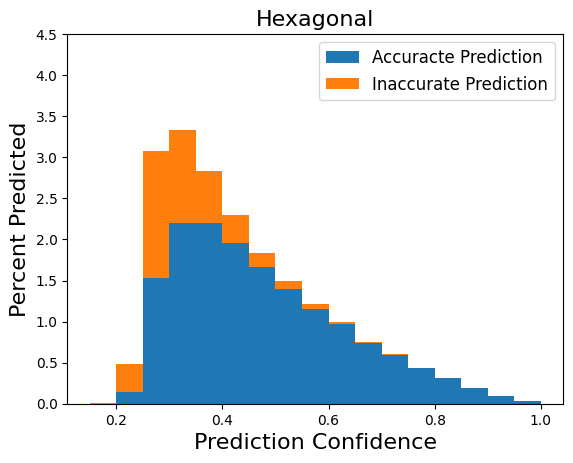

In [ ]:
# for cry_sys in ['cubic', 'hexagonal', 'trigonal', 'tetragonal', 'orthorhombic', 'monoclinic']:
for cry_sys in ['hexagonal']:
    cry_sys_df = rf_diff_obj.output_df.loc[rf_diff_obj.output_df['Predictions Crystal System'] == cry_sys]
    true_cry_sys_pred = cry_sys_df.loc[cry_sys_df['True Values Crystal System']==cry_sys]	
    wrong_pred = cry_sys_df.loc[cry_sys_df['True Values Crystal System']!=cry_sys]
    # plt.hist(cry_sys_df['Prediction Confidence'], bins=np.arange(0.15, 1.05, 0.05), facecolor = 'white', density = True)
    hist = plt.hist([np.asarray(true_cry_sys_pred['Confidence Crystal System']),np.asarray(wrong_pred['Confidence Crystal System'])], 
             bins=np.arange(0.15, 1.05, 0.05), stacked=True, label=['Accuracte Prediction', 'Inaccurate Prediction'], density = True)
    plt.legend(fontsize = 12)
    plt.title(cry_sys.capitalize(), fontsize = 16)
    plt.ylim([0,4.5])
    plt.ylabel('Percent Predicted', fontsize = 16)
    plt.xlabel('Prediction Confidence', fontsize = 16)
    mpl.style.use('default')
    plt.rcParams['pdf.fonttype'] = 'truetype'
    # plt.savefig('Figures/Figure S4/Figure S4 '+ cry_sys +'.pdf', bbox_inches="tight")
    plt.show()

In [ ]:
# confidence vs probability of accuracy for hexagonal patterns, two examples

print(hist[1][3:5])
hist[0][0][3]/hist[0][1][3]

[0.3  0.35]


0.6600901500036946

In [ ]:
print(hist[1][7:9])
hist[0][0][7]/hist[0][1][7]

[0.5  0.55]


0.9379934210526315